# id/x Final Assignment

- Name : Muhammad Ariq Arfina
- Linkedin : https://www.linkedin.com/in/muhammad-ariq-arfina-2633b5195/

I will be working on a project for a loan company as the last project of my contract time as an internal data scientist at ID/X Partners. On this project, I work with a lot of other departments to develop innovative solutions for the business.

I was requested using a dataset that the company provided, which contains information on accepted and rejected loans, to create a model that can forecast credit risk. In order to show solutions to clients, I must also produce graphic materials.

## Import Library

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Dictionary

Column | Description
:---|:---
`id` | A unique LC assigned ID for the loan listing.
`member_id ` | A unique LC assigned Id for the borrower member.
`loan_amnt` | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
`funded_amnt` | The total amount committed to that loan at that point in time.
`funded_amnt_inv` | The total amount committed to that loan at that point in time.
`term` | The number of payments on the loan. Values are in months and can be either 36 or 60.
`int_rate` | Interest Rate on the loan
`installment` | The monthly payment owed by the borrower if the loan originates.
`grade` | LC assigned loan grade
`sub_grade` | LC assigned loan subgrade
`emp_title` | The job title supplied by the Borrower when applying for the loan.
`emp_length` | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
`home_ownership` | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
`annual_inc` | The self-reported annual income provided by the borrower during registration.
`verification_status` | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
`issue_d` | Last month payment was received
`loan_status` | Loan payment status
`pymnt_plan` | Loan payment plan
`url` | URL for the LC page with listing data.
`desc` | Loan description provided by the borrower
`purpose` | A category provided by the borrower for the loan request. 
`title` | The loan title provided by the borrower
`zip_code` | The first 3 numbers of the zip code provided by the borrower in the loan application.
`addr_state` | The state provided by the borrower in the loan application
`dti` | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
`delinq_2yrs` | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
`earliest_cr_line` | The date the borrower's earliest reported credit line was opened
`inq_last_6mths` | The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
`mths_since_last_delinq` | The number of months since the borrower's last delinquency.
`mths_since_last_record` | The number of months since the last public record.
`open_acc` | Number of open trades
`pub_rec` | Number of derogatory public records
`revol_bal` | Total credit revolving balance
`revol_util` | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
`total_acc` | The total number of credit lines currently in the borrower's credit file
`initial_list_status` | wholeloan platform expiration date
`out_prncp` | 
`out_prncp_inv` |
`total_pymnt` |
`total_pymnt_inv` |
`total_rec_prncp` |
`total_rec_int` |
`total_rec_late_fee` |
`recoveries` |
`collection_recovery_fee` |
`last_pymnt_d` | Last month payment was received 
`last_pymnt_amnt` | Last total payment amount received
`next_pymnt_d` | Next scheduled payment date
`last_credit_pull_d` | The most recent month LC pulled credit for this loan
`collections_12_mths_ex_med` | Number of collections in 12 months excluding medical collections
`mths_since_last_major_derog` | Months since most recent 90-day or worse rating
`policy_code` | publicly available policy_code=1; new products not publicly available policy_code=2
`application_type` | Indicates whether the loan is an individual application or a joint application with two co-borrowers
`annual_inc_joint` | The combined self-reported annual income provided by the co-borrowers during registration
`dti_joint` | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
`verification_status_joint` | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
`acc_now_delinq` | The number of accounts on which the borrower is now delinquent.
`tot_coll_amt` | Total collection amounts ever owed
`tot_cur_bal` | Total current balance of all accounts
`open_acc_6m` | Number of open trades in last 6 months
`open_il_6m` | Number of currently active installment trades
`open_il_12m` | Number of installment accounts opened in past 12 months
`open_il_24m` | Number of installment accounts opened in past 24 months
`mths_since_rcnt_il` | Months since most recent installment accounts opened
`total_bal_il` | Total current balance of all installment accounts
`il_util` | Ratio of total current balance to high credit/credit limit on all install acct
`open_rv_12m` | Number of revolving trades opened in past 12 months
`open_rv_24m` | Number of revolving trades opened in past 24 months
`max_bal_bc` | Maximum current balance owed on all revolving accounts
`all_util` | 
`total_rev_hi_lim` | Total revolving high credit/credit limit
`inq_fi` | Number of personal finance inquiries
`total_cu_tl` | Number of finance trades
`inq_last_12m` | Number of credit inquiries in past 12 months

## Import Files

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)

In [3]:
df= pd.read_csv('loan_data_2007_2014 (1).csv')
df.head()

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Descriptive Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Observation:
- In columns `annual_inc_joint`, `dti_joint`, `verification_status_joint`, `open_acc_6m`, `open_il_6m`, `open_il_12m`, `open_il_24m`, `mths_since_rcnt_il`, `,`_bal _b `,`_bal total_cu_tl`, `inq_last_12m` all rows are null, will be dropped first
- In columns `desc`, `mths_since_last_delinq`, `mths_since_last_record`, `next_payment_d`, and `mths_since_last_major_derog` more than half of the rows have null values, may be imputed during preprocessing
- Columns `emp_title`, `emp_length`, `tot_coll_amt`, `tot_cur_bal`, and `total_rev_hi_lim` have not too many null values, will be imputed during pre-processing
- In `title`, `earliest_cr_line`, `inq_last_6mths`, `open_acc`, `pub_rec`, `revol_util`, `total_acc`, `last_pymnt_d`, `pulllasd_credit`, `null_credit` columns dropped during pre processing

In [5]:
df = df.dropna(axis='columns', how='all')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

All features that are null are deleted

In [7]:
nums = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64']]
cats = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

In [8]:
df[cats].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124436,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


Observation :
- The `Term` feature is dominated by 36 months, with a percentage of 72.4%
- The `Grade` feature is dominated by customers with grade B, with a percentage of 29.3%
- The `sub_grade` feature is dominated by customers with grade B3, with a percentage of 6.7%
- 1.1% of customers work as teachers
- 43.04% of customers have worked for more than 10 years
- 50.5% of customers have a residence with Mortgage status
- 36% of customers have verified all their files
- 48% of customers are currently on loan
- Total of 58.8% of customers took credit due to debt consolidation

In [9]:
df[nums].describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [10]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom term:
 36 months    337953
 60 months    128332
Name: term, dtype: int64

Value count kolom grade:
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Value count kolom sub_grade:
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

Value count kolom emp_title:
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern

## Univariate Analysis

### Distribution Plot

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


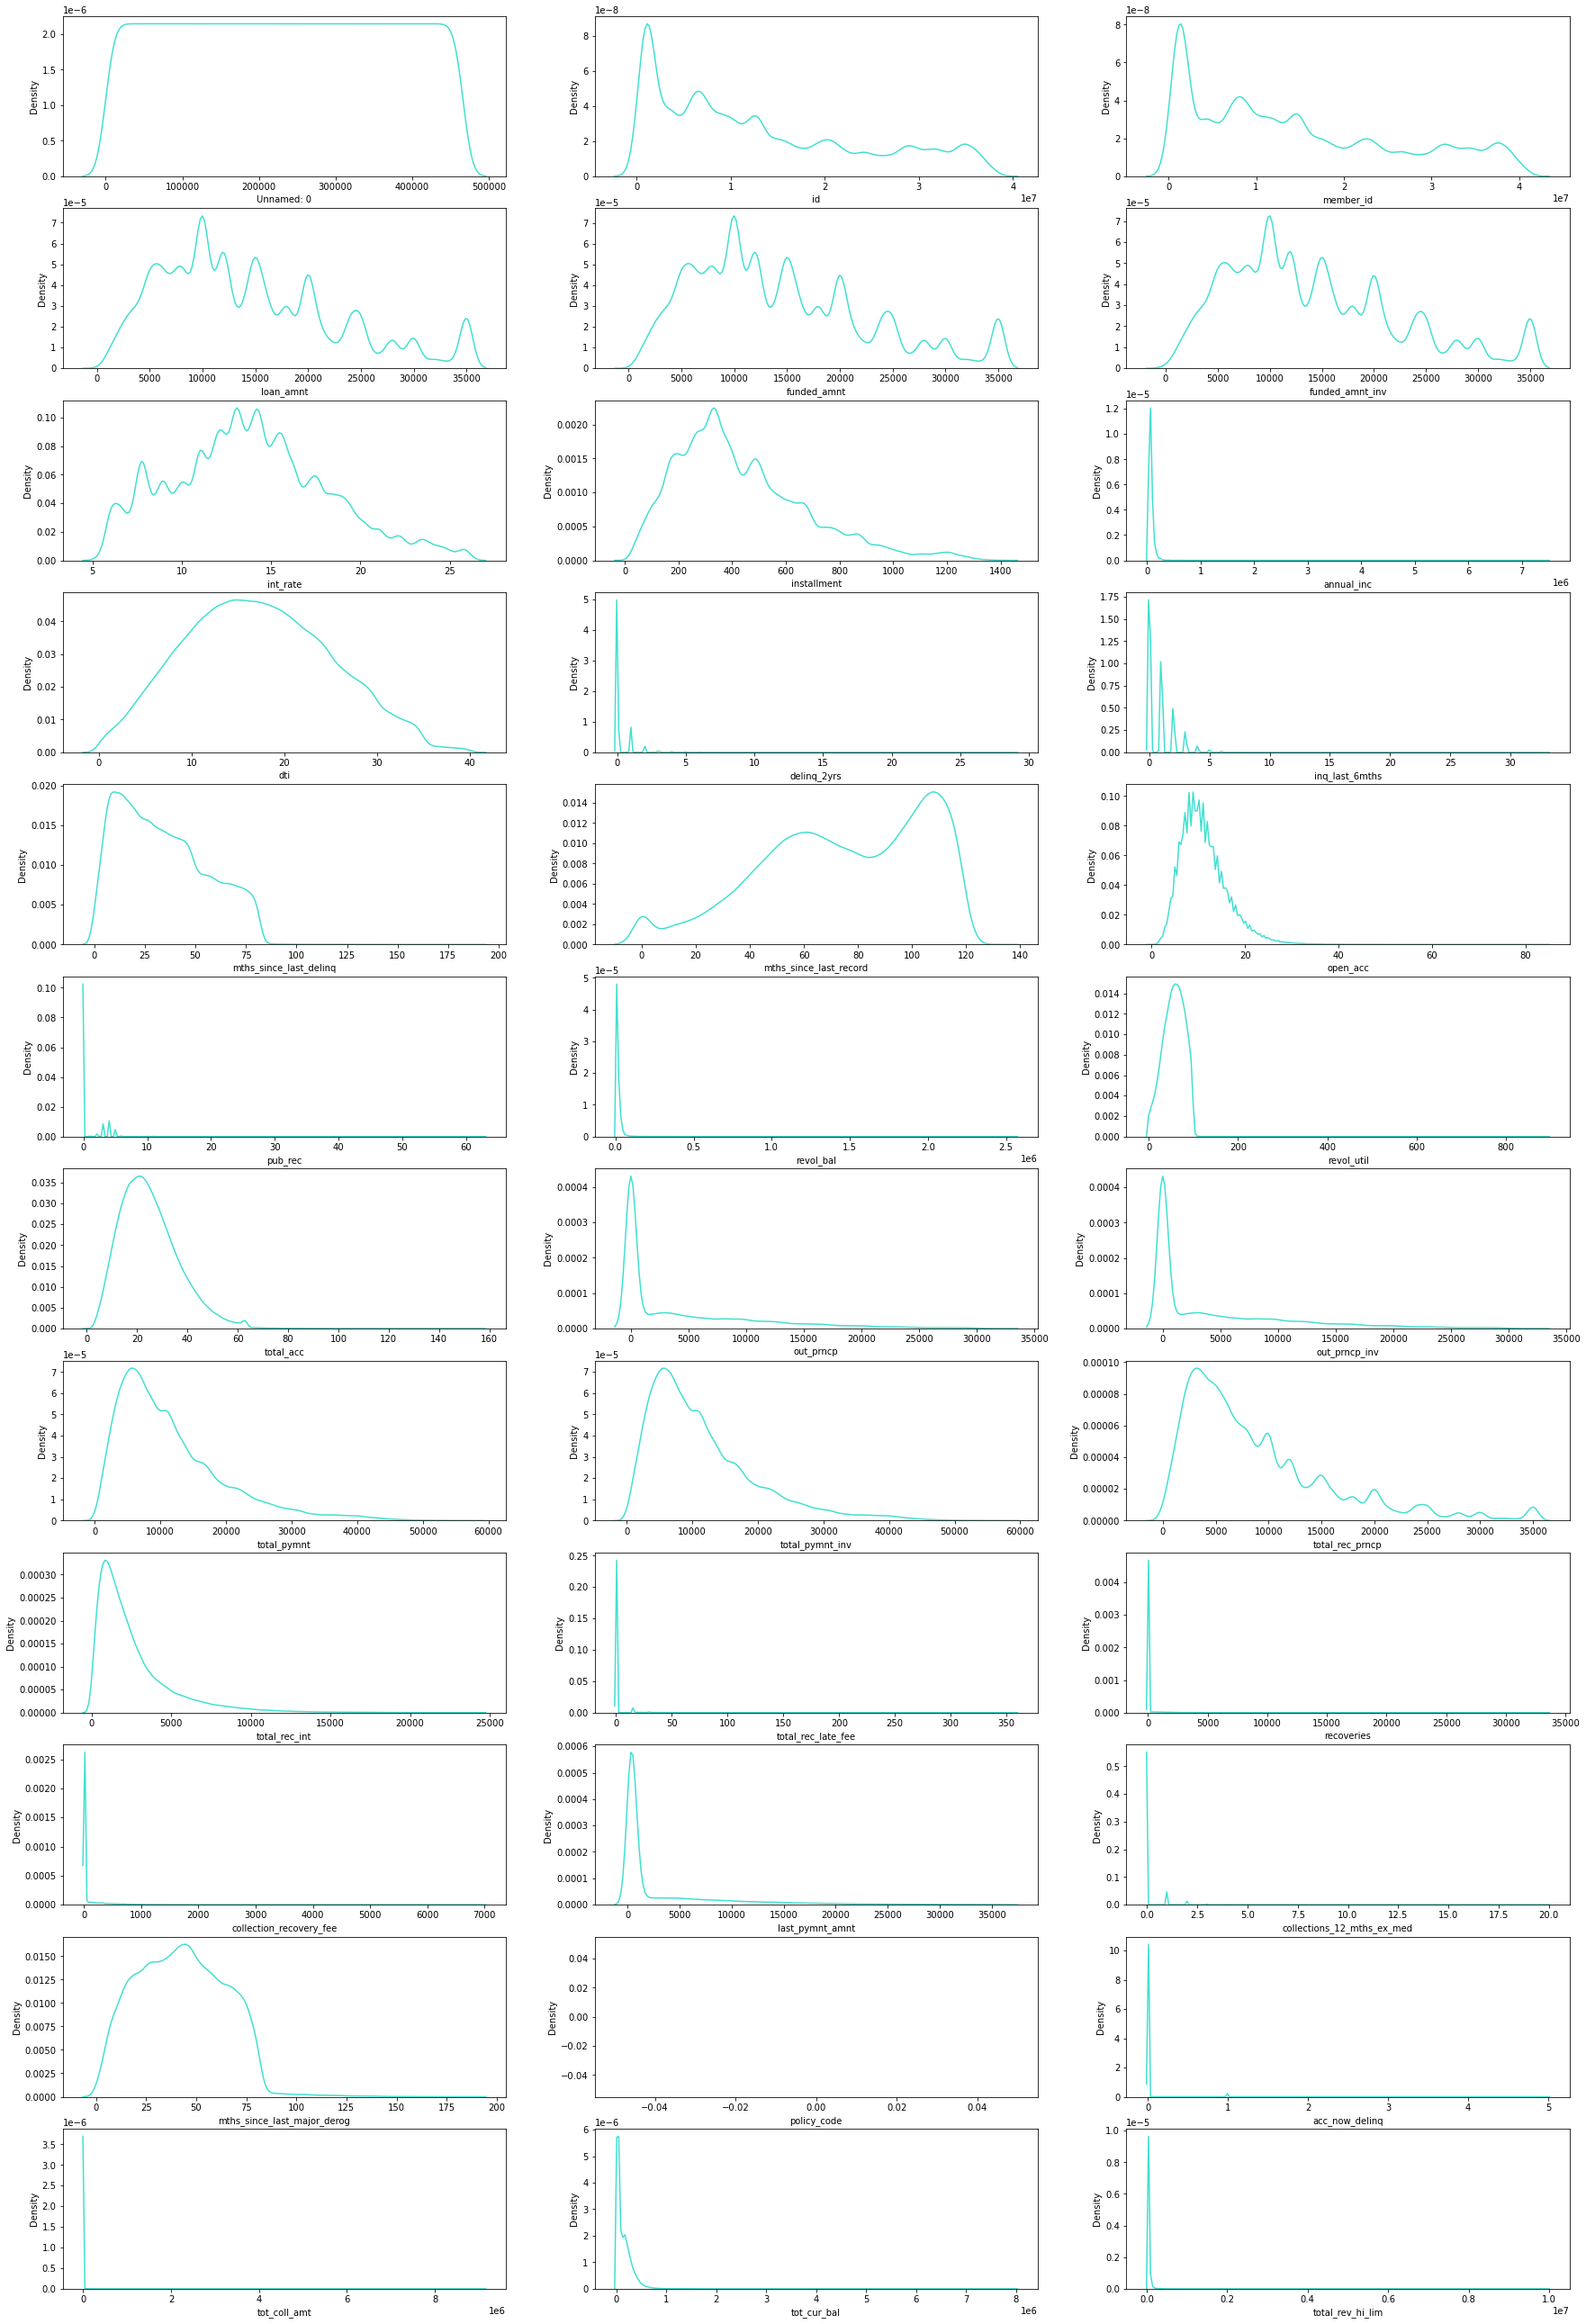

In [11]:
features = nums
plt.figure(figsize=(30, 70))
for i in range(0, len(nums)):
    plt.subplot(18,3, i+1)
    sns.kdeplot(x=df[features[i]], color='turquoise')
    plt.xlabel(features[i])

Observation:
- For skewed columns, normalization and standardization are necessary. If needed, a log transform will also be carried out
- Data that has a null value needs to be dropped

### Box Plot

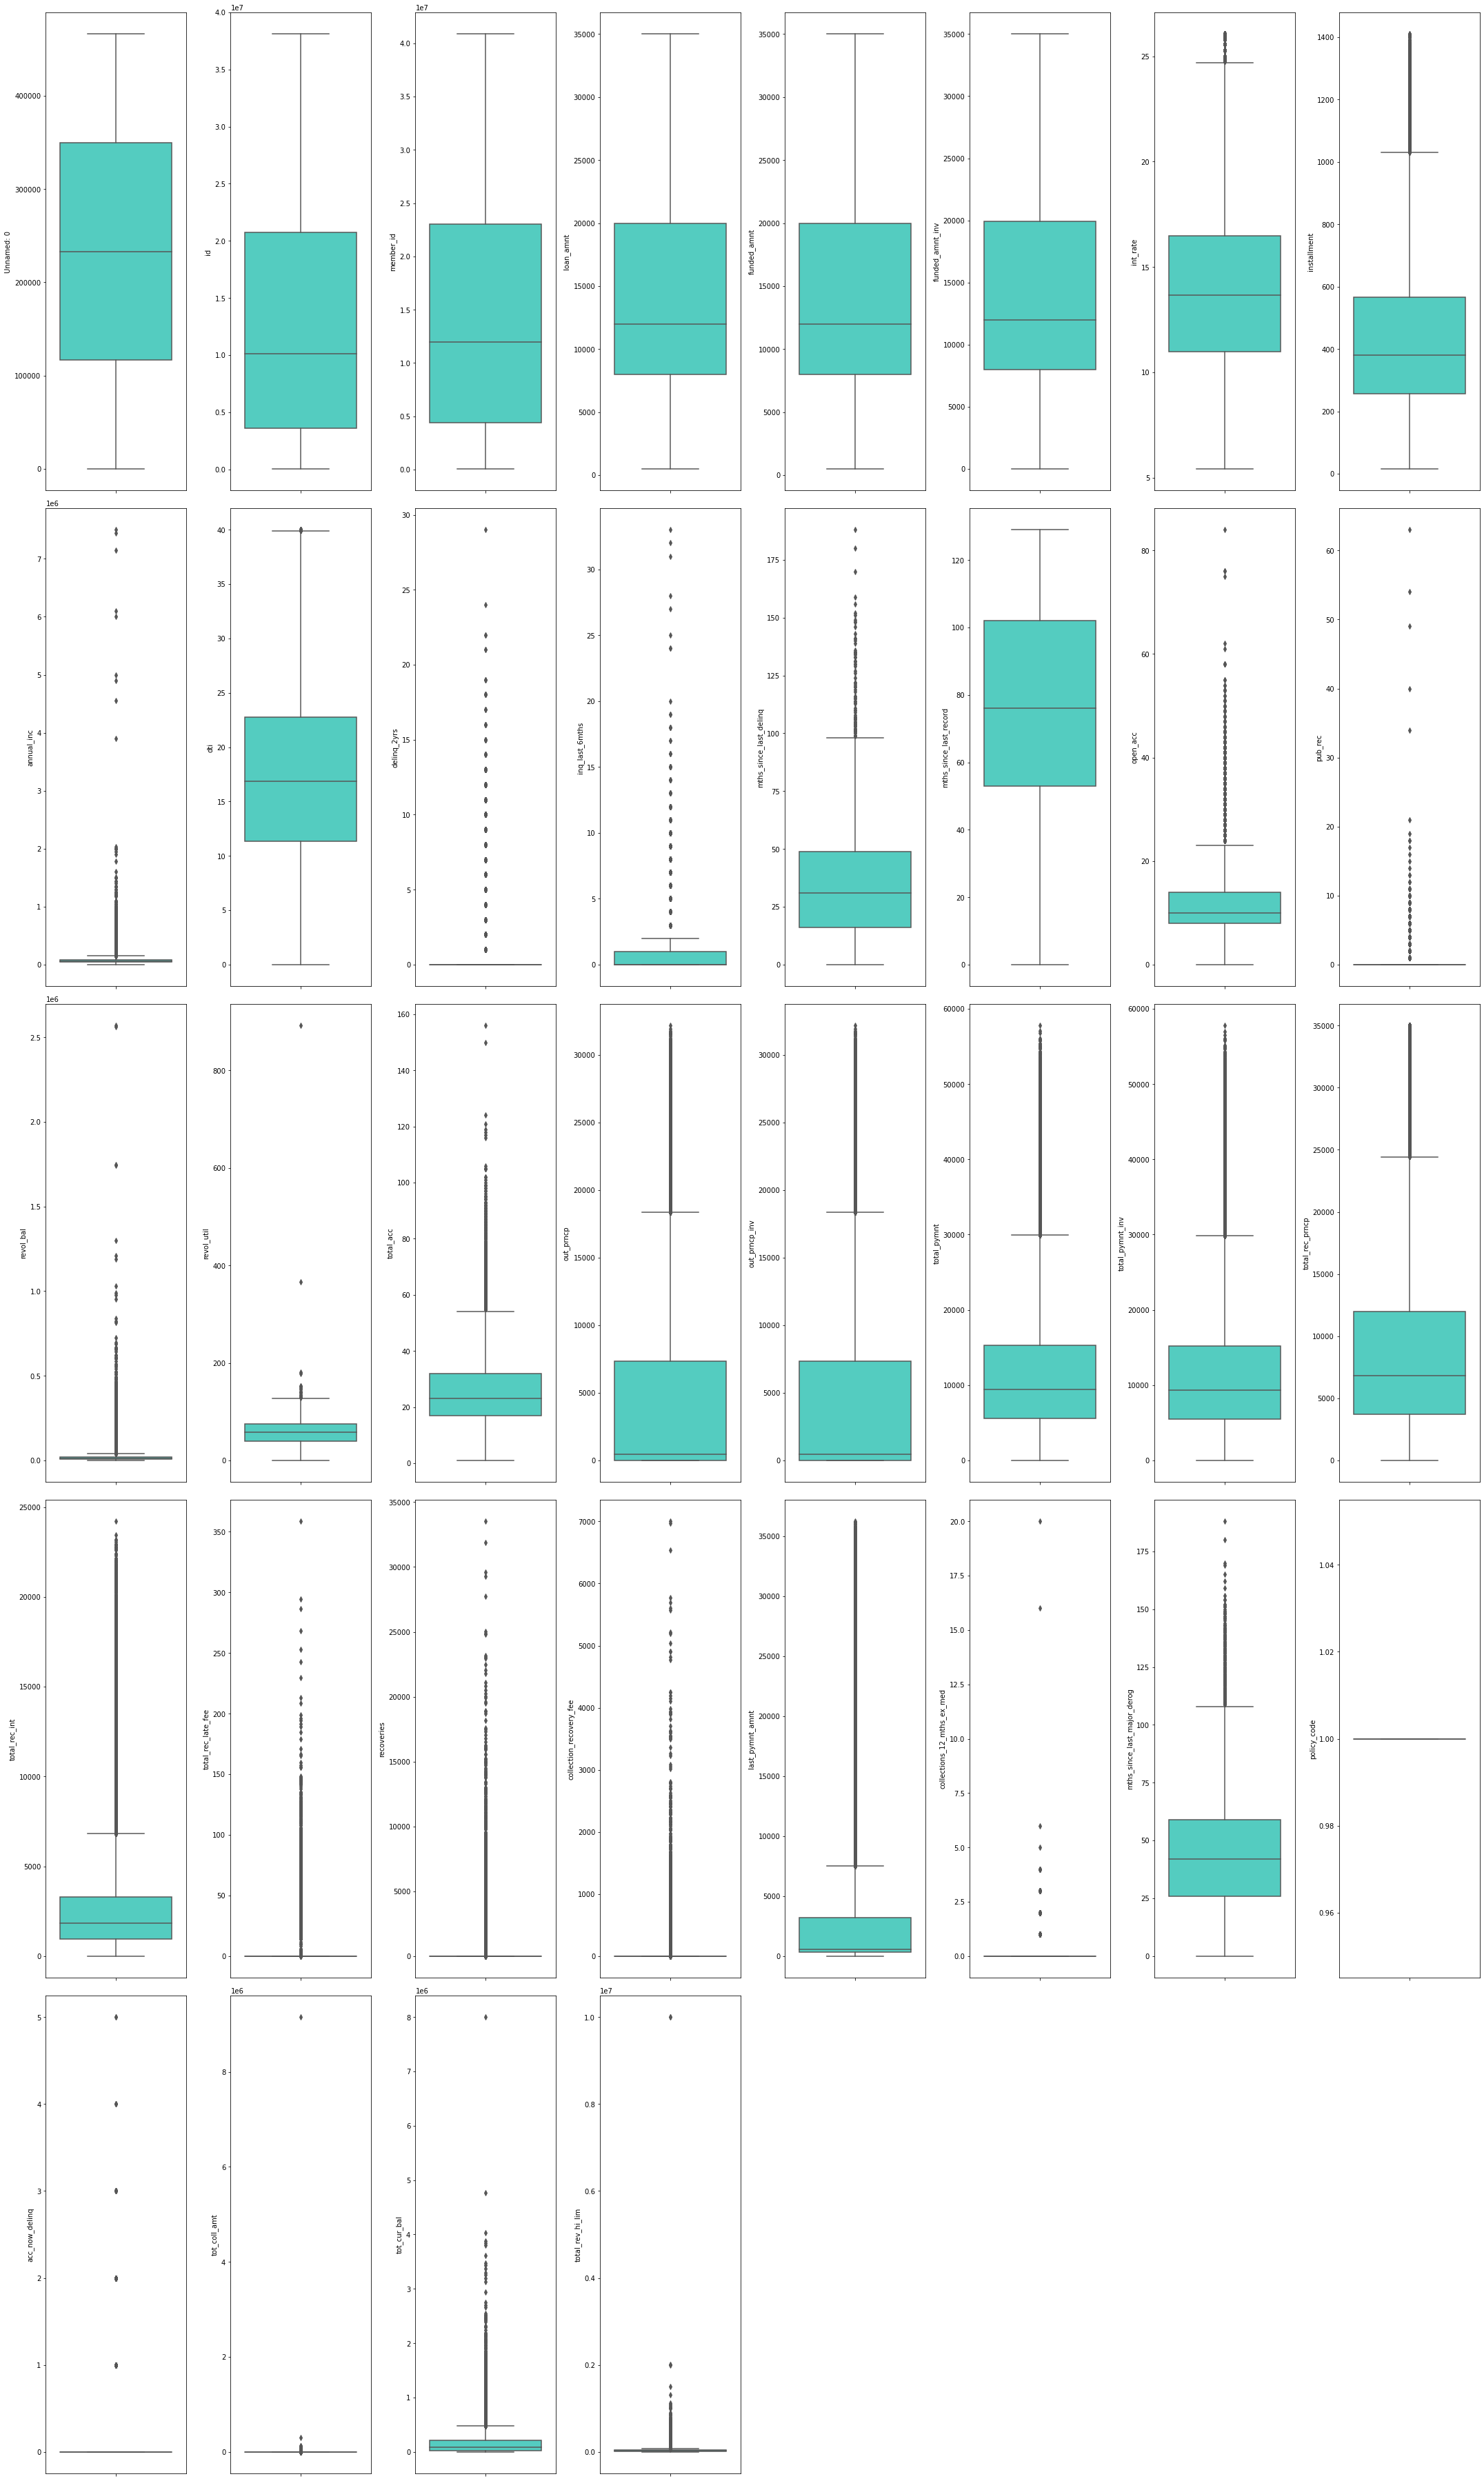

In [12]:
features = nums
plt.figure(figsize=(30, 70))
for i in range(0, len(features)):
    plt.subplot(7,8, i+1)
    sns.boxplot(y=df[features[i]], color='turquoise', orient='v')
    plt.tight_layout()

## Multivariate Analysis

### Correlation Heatmap

In [13]:
df.corr()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
Unnamed: 0,1.000000,0.493963,0.503014,0.075282,0.080043,0.090814,0.033313,0.070622,0.026413,0.097809,0.063351,-0.025976,-0.023999,-0.103224,0.092801,0.102835,0.005550,0.011329,0.077378,0.286977,0.286986,-0.140652,-0.129300,-0.145491,-0.048047,-0.033899,-0.036249,-0.015140,-0.025864,0.046954,0.027068,NaN,0.019520,0.006304,0.003367,-0.003080
id,0.493963,1.000000,0.997299,0.067542,0.071149,0.080057,-0.030501,0.039863,0.024231,0.130291,0.072024,-0.085182,-0.033934,-0.127121,0.099886,0.105560,0.028976,-0.011012,0.074346,0.445555,0.445651,-0.284595,-0.275468,-0.278272,-0.144487,-0.042162,-0.066162,-0.030594,-0.078282,0.056528,0.027466,NaN,0.026759,0.004007,0.007574,0.023957
member_id,0.503014,0.997299,1.000000,0.070210,0.073942,0.083196,-0.028278,0.042639,0.024921,0.129867,0.072536,-0.086382,-0.034022,-0.122521,0.099950,0.107664,0.028793,-0.010093,0.074462,0.447998,0.448092,-0.282848,-0.273351,-0.277070,-0.142031,-0.043115,-0.066358,-0.030748,-0.076851,0.056772,0.027791,NaN,0.026981,0.004088,0.007827,0.023818
loan_amnt,0.075282,0.067542,0.070210,1.000000,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006841,-0.020328,-0.041361,0.011523,0.204182,-0.081137,0.331423,0.117756,0.235262,0.518700,0.518660,0.743841,0.743580,0.612777,0.715876,0.043650,0.110691,0.077336,0.304243,-0.008067,-0.066374,NaN,0.006283,-0.002859,0.332686,0.290208
funded_amnt,0.080043,0.071149,0.073942,0.998548,1.000000,0.996125,0.167921,0.951787,0.370311,0.058673,0.007386,-0.020970,-0.041443,0.011622,0.204983,-0.080593,0.331039,0.118885,0.235135,0.521451,0.521412,0.743363,0.743441,0.612318,0.715664,0.043350,0.110338,0.077190,0.304178,-0.007822,-0.066359,NaN,0.006472,-0.002859,0.332683,0.290206
funded_amnt_inv,0.090814,0.080057,0.083196,0.994347,0.996125,1.000000,0.169353,0.947387,0.367806,0.062606,0.008143,-0.027580,-0.036670,0.056884,0.205807,-0.078894,0.327436,0.120774,0.235456,0.525143,0.525115,0.738037,0.745460,0.607027,0.713460,0.038985,0.107944,0.073781,0.303105,-0.007175,-0.066301,NaN,0.006801,-0.002858,0.332677,0.290185
int_rate,0.033313,-0.030501,-0.028278,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046072,0.159657,0.079190,0.205641,-0.046605,-0.008992,0.012307,0.066695,-0.004589,0.323365,-0.033012,0.137427,0.137451,0.127035,0.129166,-0.032130,0.485154,0.057875,0.127893,0.082198,0.075609,0.020306,-0.006686,NaN,0.030338,0.000863,-0.097316,-0.146838
installment,0.070622,0.039863,0.042639,0.949666,0.951787,0.947387,0.148790,1.000000,0.368145,0.049919,0.017001,0.002247,-0.045757,-0.002599,0.196839,-0.070093,0.320239,0.136852,0.215906,0.408838,0.408811,0.764360,0.763895,0.663399,0.641948,0.052341,0.105666,0.075344,0.299867,-0.006055,-0.066462,NaN,0.008923,-0.002359,0.300639,0.270074
annual_inc,0.026413,0.024231,0.024921,0.370893,0.370311,0.367806,-0.046072,0.368145,1.000000,-0.188548,0.058896,0.056675,-0.058960,-0.097235,0.157784,-0.015439,0.332316,0.037582,0.224690,0.168316,0.168316,0.299784,0.298728,0.275823,0.212951,0.020273,0.016954,0.013680,0.142155,-0.000445,-0.068390,NaN,0.017133,0.001895,0.486086,0.291955
dti,0.097809,0.130291,0.129867,0.057319,0.058673,0.062606,0.159657,0.049919,-0.188548,1.000000,-0.003694,-0.012541,0.007574,0.082449,0.303914,-0.046192,0.143380,0.200412,0.228221,0.119984,0.119972,-0.026007,-0.021788,-0.063895,0.089582,-0.005747,0.021462,0.018084,-0.043068,0.000308,0.029121,NaN,0.009491,-0.003560,-0.018384,0.060972


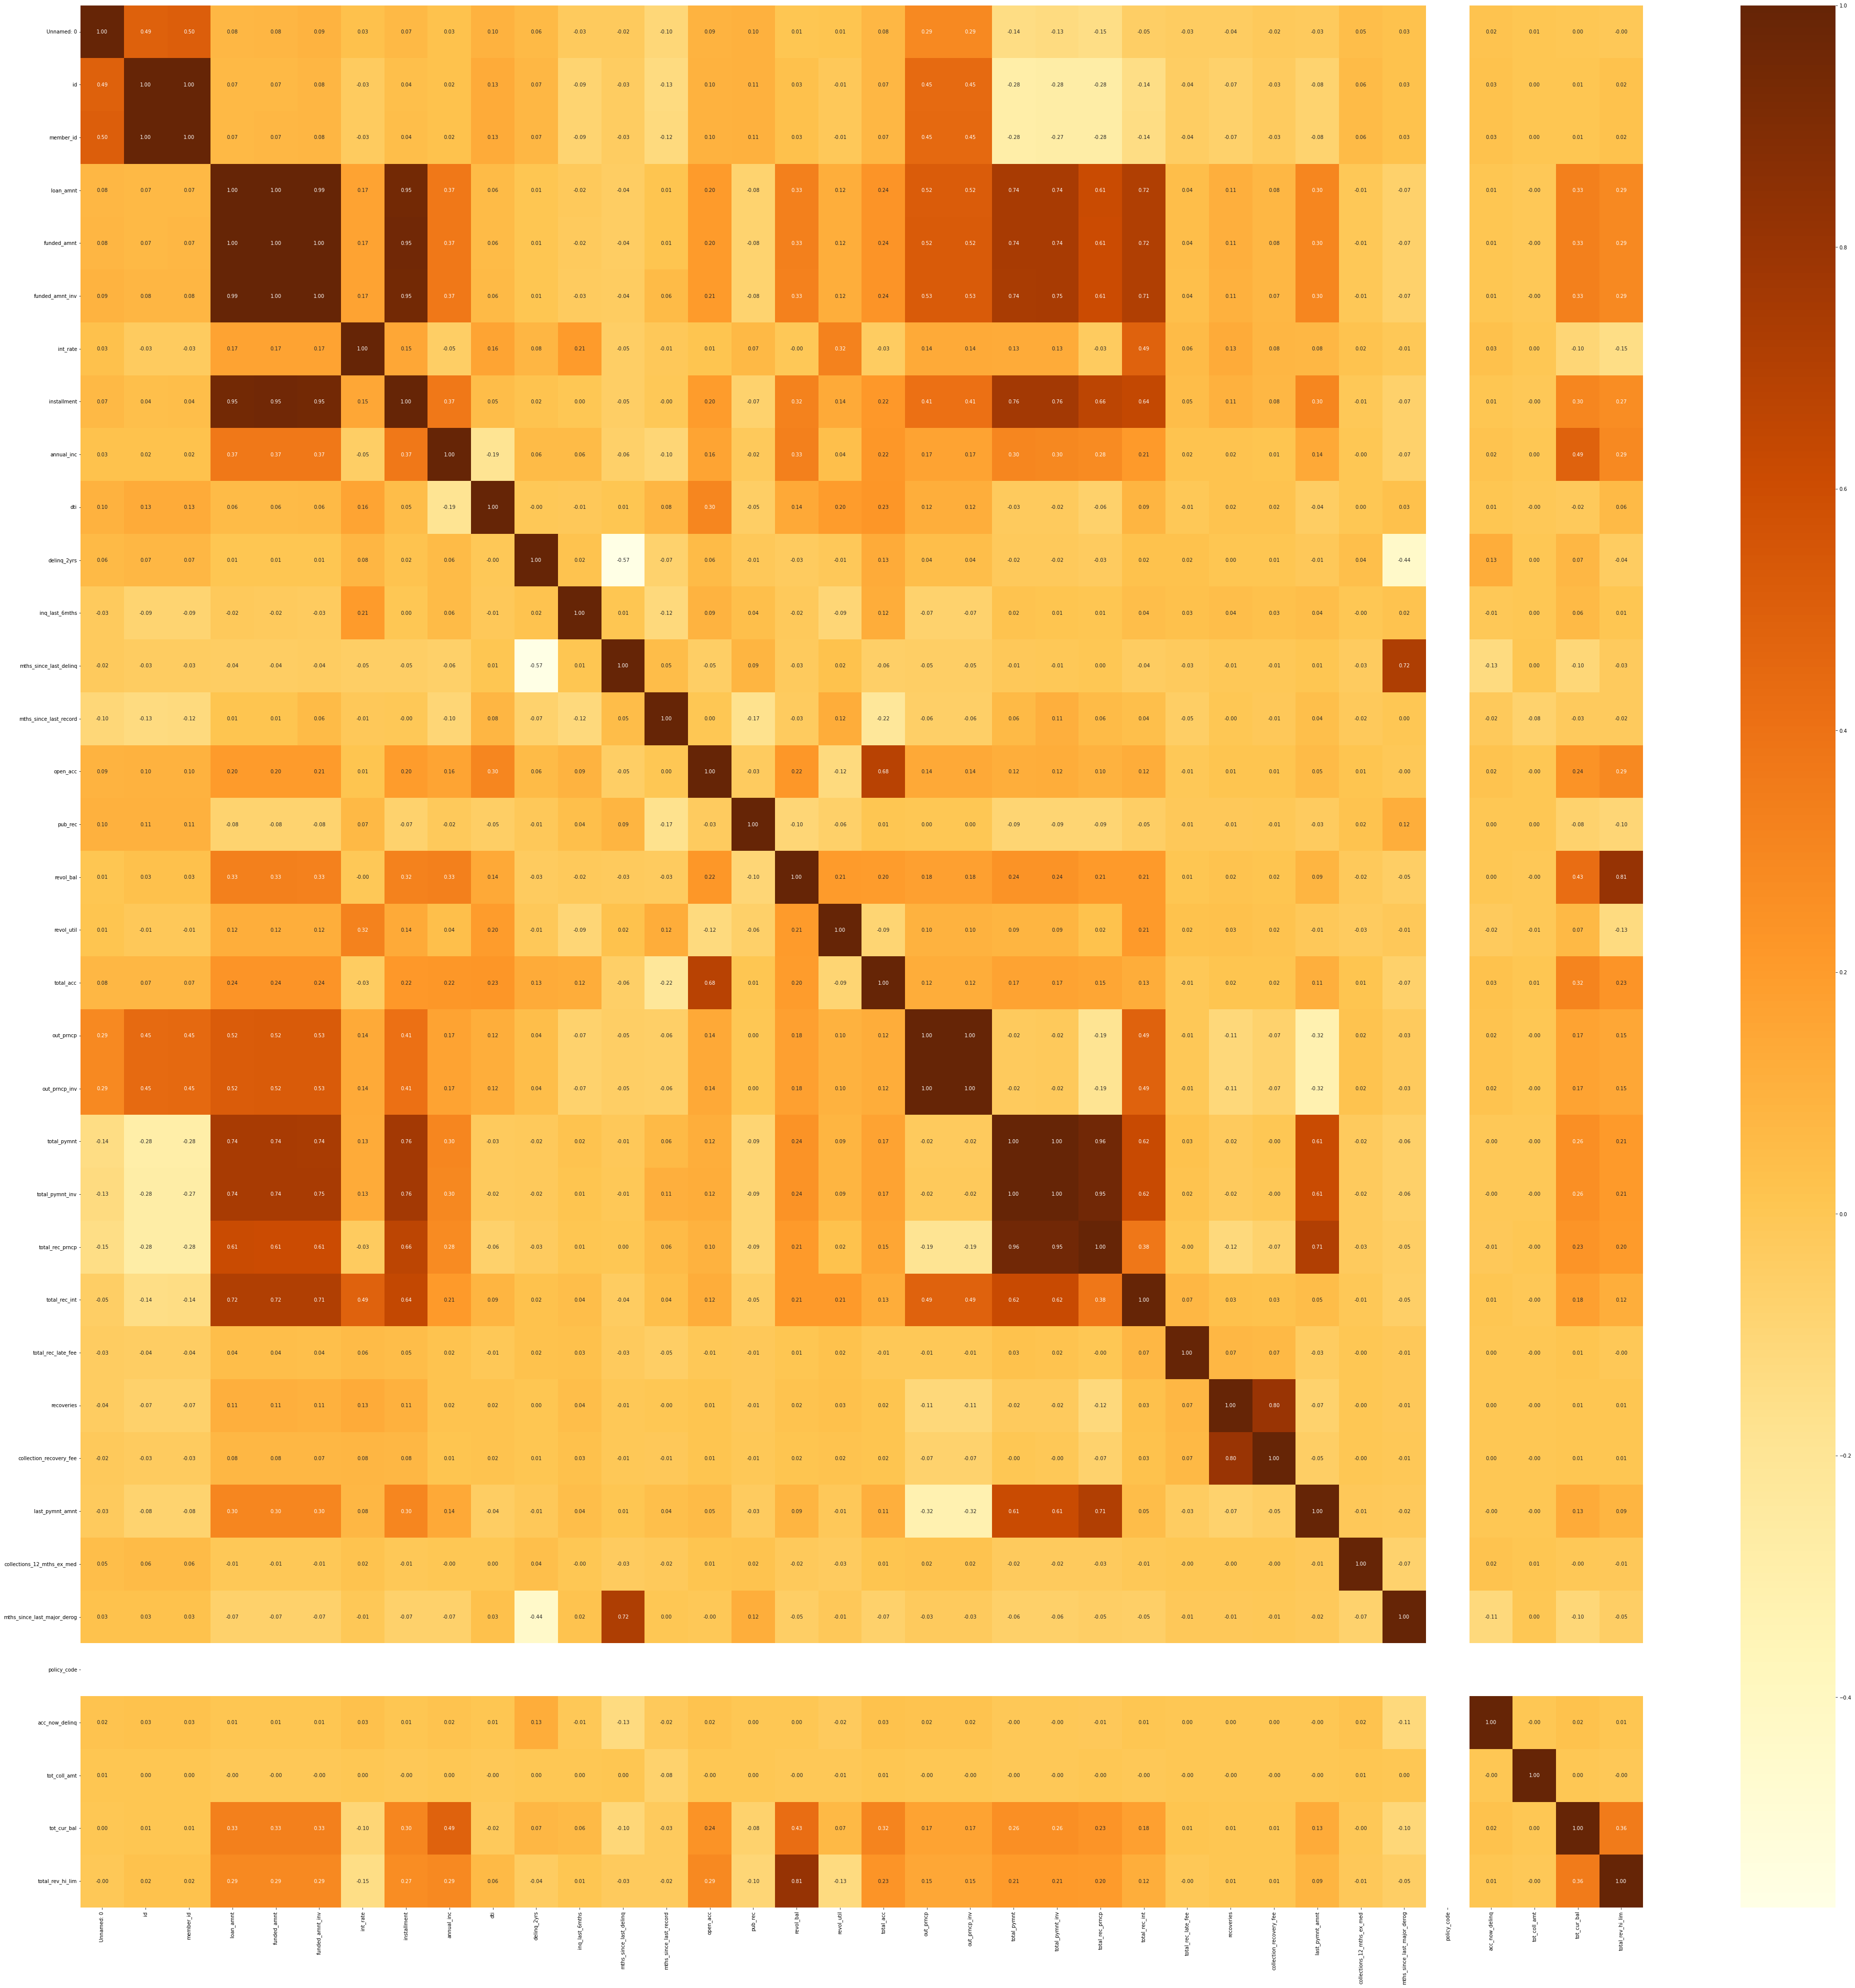

In [14]:
plt.figure(figsize=(70, 70))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
plt.savefig('corr.png')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Exploratory Data Analysis

### Credit Risk Analysis

In this section, we will explain which types of credit risk of default we believe exist. Of course, default will occur at some point.

Some of the features that we believe can be examined from the lender's perspective are as follows:

- Loan amount proposed by Customer (`loan_amnt`)
- The amount collected by the lender (`funded_amnt`)
- Amount of money given to lenders by investors (`funded_amnt_inv`)
- Amount already paid to the lender (`total_pymnt`)

Some of the characteristics that we believe are important in determining credit risk for customers applying for loans are as follows:

- Grade of Customer Credit Risk (`grade`)
- Annual Income for Credit Application Customers (`annual_inc`)
- The reason for borrowing money (`purpose`).
- The status of home ownership (`home_ownership`)
- Employment status (`emp_title`)
- Work length (`emp_length`)
- Term loan (`term`)
- The number of incidents of 30+ days in arrears in the borrower's credit file in the last two years (`delinq_2yrs`).

### Average Loan Amount Issued per Year

In [16]:
df['issue_d'].value_counts()

Oct-14    38782
Jul-14    29306
Nov-14    25054
May-14    19099
Apr-14    19071
Aug-14    18814
Jun-14    17179
Mar-14    16513
Jan-14    15628
Feb-14    15269
Dec-13    15020
Nov-13    14676
Oct-13    14114
Sep-13    12987
Aug-13    12674
Jul-13    11910
Jun-13    10899
Sep-14    10606
May-13    10350
Dec-14    10307
Apr-13     9419
Mar-13     8273
Feb-13     7561
Jan-13     6872
Nov-12     6382
Oct-12     6263
Sep-12     6087
Dec-12     6066
Aug-12     5419
Jul-12     4627
Jun-12     3817
May-12     3400
Apr-12     3230
Mar-12     2914
Jan-12     2602
Feb-12     2560
Dec-11     2267
Nov-11     2232
Oct-11     2118
Sep-11     2067
Aug-11     1934
Jul-11     1875
Jun-11     1835
May-11     1704
Apr-11     1563
Mar-11     1448
Jan-11     1380
Dec-10     1335
Feb-11     1298
Oct-10     1232
Nov-10     1224
Jul-10     1204
Sep-10     1189
Aug-10     1175
Jun-10     1105
May-10      989
Apr-10      912
Mar-10      828
Feb-10      682
Jan-10      662
Nov-09      662
Dec-09      658
Oct-09  

In [17]:
df[['Month', 'Year']] = df['issue_d'].str.split('-', expand=True)
df[['Month', 'Year']].head()

,Month,Year
0,Dec,11
1,Dec,11
2,Dec,11
3,Dec,11
4,Dec,11


In [18]:
df['Year'] = df['Year'].replace(['07','08','09','10','11','12','13','14'],[2007,2008,2009,2010,2011,2012,2013,2014])

Text(0, 0.5, 'Average loan amount issued')

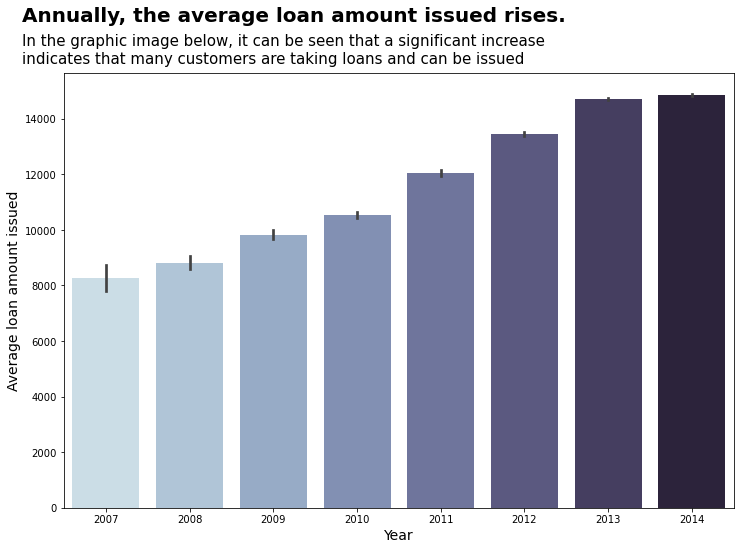

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='loan_amnt', data=df, palette='ch:s=.25,rot=-.25')

plt.text(x= -1, y=17500, s="Annually, the average loan amount issued rises.", 
         fontsize=20, fontweight='bold')
plt.text(x=-1, y=16000, s="In the graphic image below, it can be seen that a significant increase \nindicates that many customers are taking loans and can be issued", 
         fontsize=15)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

Observation:
- The average loan amount is rising year by year

### Loan Amount vs Total Payment

Text(-62000, 75000, 'We see that feature Loan Amount and  \nTotal Payment are positively correlated')

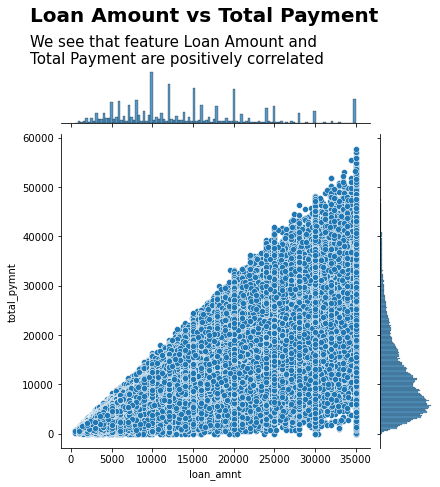

In [20]:
plot = sns.jointplot(x=df["loan_amnt"], y=df["total_pymnt"], palette="ch:s=.25,rot=-.25")

plt.text(x=-62000, y=83500, s="Loan Amount vs Total Payment", 
         fontsize=20, fontweight='bold')

plt.text(x=-62000, y=75000, s="We see that feature Loan Amount and  \nTotal Payment are positively correlated", 
         fontsize=15)

In [21]:
df[['total_pymnt', 'loan_amnt', 'loan_status', 'term']].head()

,total_pymnt,loan_amnt,loan_status,term
0,5861.071414,5000,Fully Paid,36 months
1,1008.710000,2500,Charged Off,60 months
2,3003.653644,2400,Fully Paid,36 months
3,12226.302210,10000,Fully Paid,36 months
4,3242.170000,3000,Current,60 months


Observation:
- Loan Amount and Total Payment have a positive correlation

### Distribution of Verification Status

Text(0, 0.5, 'Count')

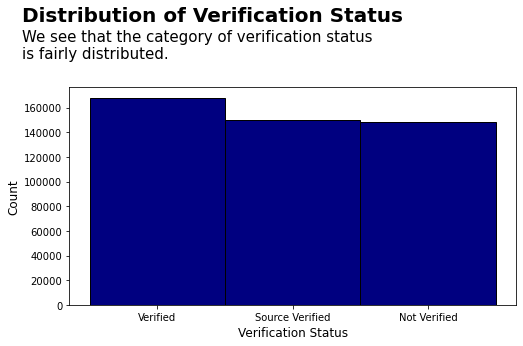

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(x='verification_status', data=df, color= "navy", multiple='stack'
            ,alpha = 1)

plt.text(x=-1, y=230000, s="Distribution of Verification Status", 
         fontsize=20, fontweight='bold')
plt.text(x=-1, y=200000, s="We see that the category of verification status   \nis fairly distributed. ", 
         fontsize=15)
plt.xlabel('Verification Status', fontsize=12) 
plt.ylabel('Count', fontsize=12)

In [23]:
df['verification_status'].value_counts()

Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64

Observation:
- 36% customer is Verified 
- 31% customer is Not Verified

### Loan Status Distribution

In [24]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Observation:
- `loan_status` feature has many unique values
- We need to group this into the bad loans and good loans (Feature Engineer)

In [25]:
# grouping bad loan conditions in variable
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

# making loan condition column
df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

In [26]:
df['loan_condition'].value_counts()

Good Loan    410953
Bad Loan      55332
Name: loan_condition, dtype: int64

[Text(0, 0.5, 'Percentage(%)')]

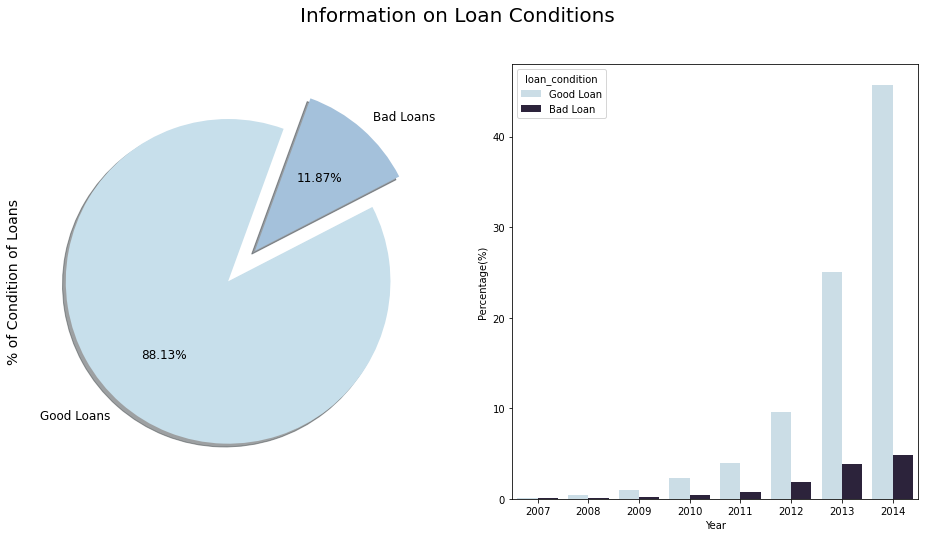

In [27]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = sns.color_palette("ch:s=.25,rot=-.25", 7)
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.25],autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = ["#603451", "#E01E1B"]

sns.barplot(x="Year", y="loan_amnt", hue="loan_condition", data=df, palette='ch:s=.25,rot=-.25', estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="Percentage(%)")

Observation:
- **Good Loans is dominated condition**, where percentage is 88,13%

### Loan Purpose

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


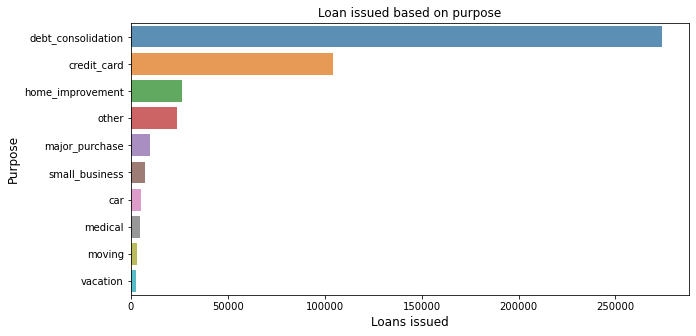

In [28]:
purpose_count = df['purpose'].value_counts()
purpose_count = purpose_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(purpose_count.values, purpose_count.index, alpha=0.8)
plt.title('Loan issued based on purpose')
plt.ylabel('Purpose', fontsize=12)
plt.xlabel('Loans issued', fontsize=12)
plt.show()

Observation:
- Total of **58.8% of customers took credit due to debt consolidation**

### Home Ownership Status

In [29]:
other = ['OTHER','NONE','ANY']

df['home_ownership_status'] = np.nan

def home_status(status):
    if status in other:
        return 'OTHER'
    elif status == 'RENT':
        return 'RENT'
    elif status == 'OWN':
        return 'OWN'
    else:
        return 'MORTGAGE'

df['home_ownership_status'] = df['home_ownership'].apply(home_status)

In [30]:
df['home_ownership_status'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership_status, dtype: int64

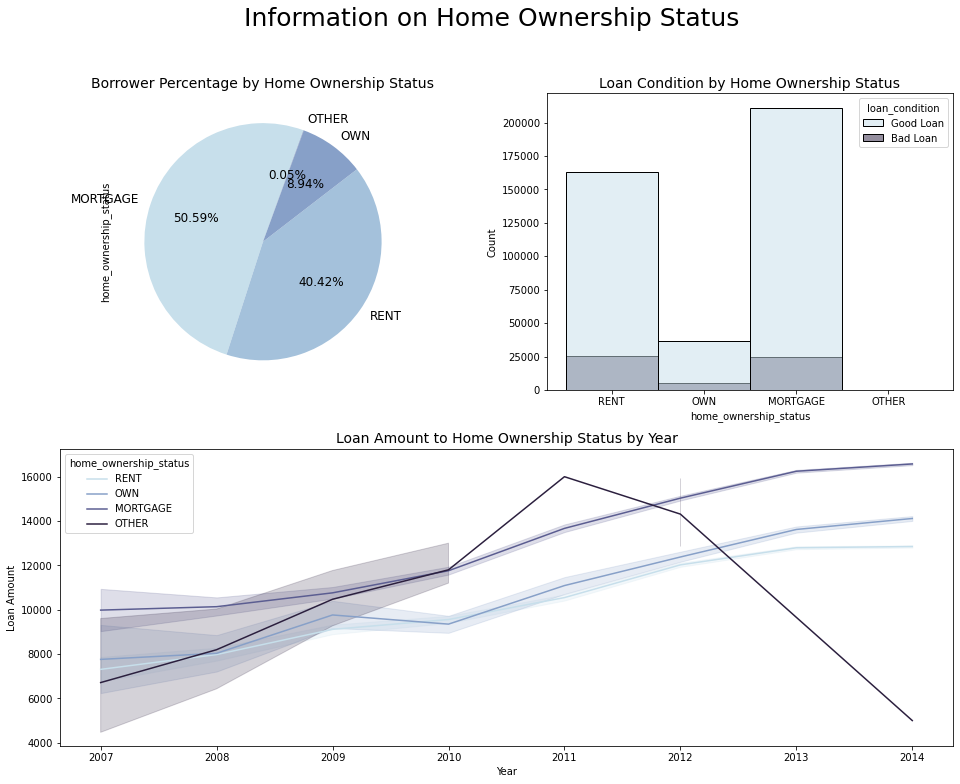

In [31]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Home Ownership Status', fontsize=25)

df["home_ownership_status"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=sns.color_palette("ch:s=.25,rot=-.25", 7), 
                                             labels=['MORTGAGE','RENT','OWN','OTHER'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Home Ownership Status', fontsize=14)

sns.histplot(x=df['home_ownership_status'], hue=df['loan_condition'],ax=ax2,palette='ch:s=.25,rot=-.25')
ax2.set_title('Loan Condition by Home Ownership Status', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['home_ownership_status'],ax=ax3,palette='ch:s=.25,rot=-.25')
ax3.set_title('Loan Amount to Home Ownership Status by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

Observation:
- **50.59% of customers have a residence with Mortgage status**

### Credit Score

<Figure size 1080x864 with 0 Axes>

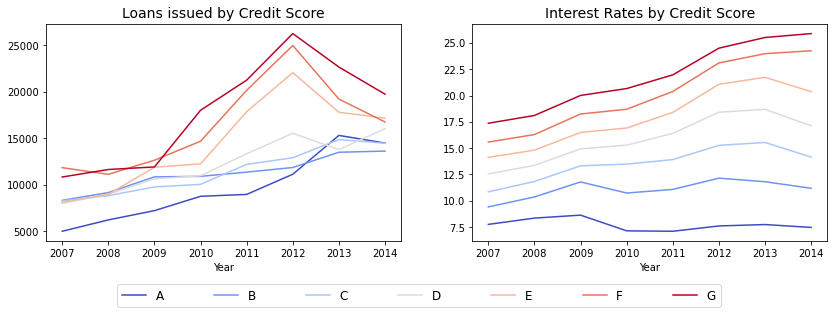

In [32]:
plt.figure(figsize=(15,12))
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['Year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['Year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

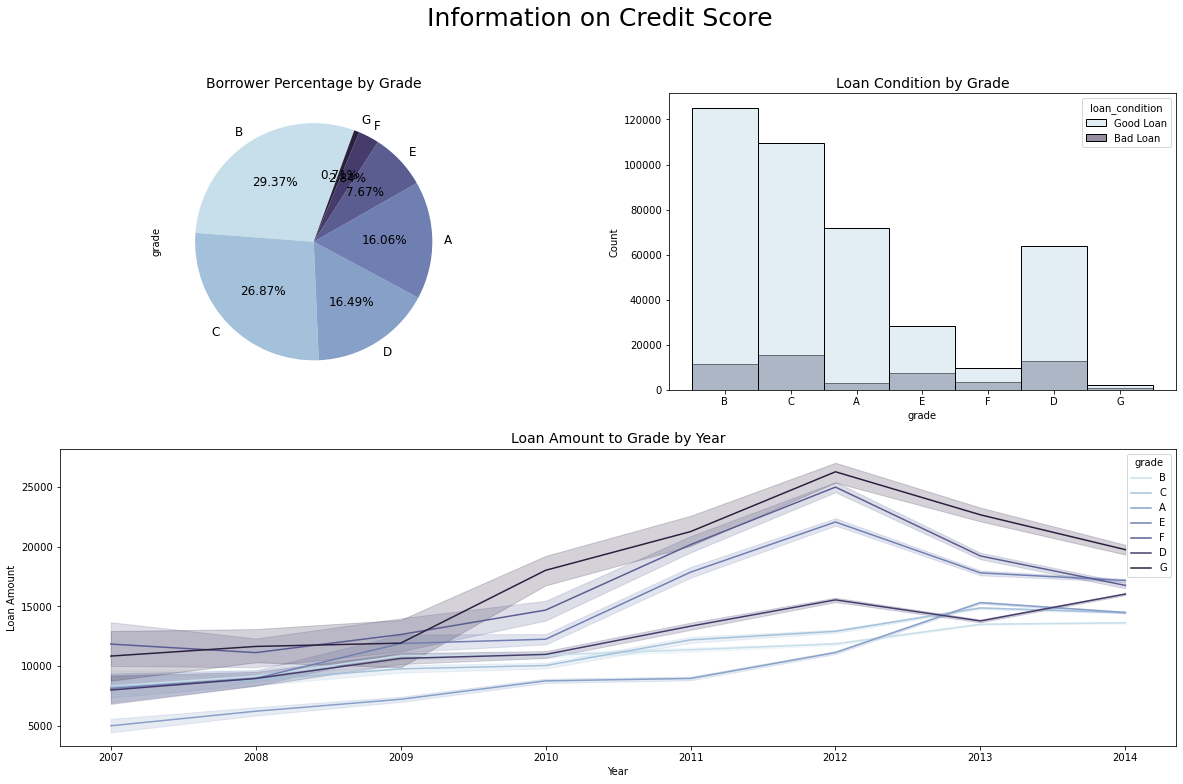

In [33]:
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Credit Score', fontsize=25)

df["grade"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=sns.color_palette("ch:s=.25,rot=-.25", 7), 
                                             labels=['B', 'C', 'D', 'A', 'E', 'F', 'G'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Grade', fontsize=14)

sns.histplot(x=df['grade'], hue=df['loan_condition'],ax=ax2,palette='ch:s=.25,rot=-.25')
ax2.set_title('Loan Condition by Grade', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['grade'],ax=ax3,palette='ch:s=.25,rot=-.25')
ax3.set_title('Loan Amount to Grade by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

Observation:
- The `Grade` feature is dominated by customers with grade **B**, with a percentage of 29.37%
- Customers with grade **G tend to take out more loans than other Credit Score**
- **Feature Grade needs to be considered in the decision, whether customer loans can be good loaner or not. There are indications that customers with a 'G' credit score are at risk of default.**

### Income Category

In [34]:
df['income_category'] = df.apply(lambda x: 'High' if x['annual_inc'] > 200000 else ('Medium' if x['annual_inc'] > 100000 and x['annual_inc'] <= 200000 else 'Low'), axis=1)

df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Month,Year,loan_condition,home_ownership_status,income_category
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Good Loan,RENT,Low
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Bad Loan,RENT,Low
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Good Loan,RENT,Low
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Good Loan,RENT,Low
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Dec,2011,Good Loan,RENT,Low


In [35]:
df['income_category'].value_counts()

Low       388628
Medium     69857
High        7800
Name: income_category, dtype: int64

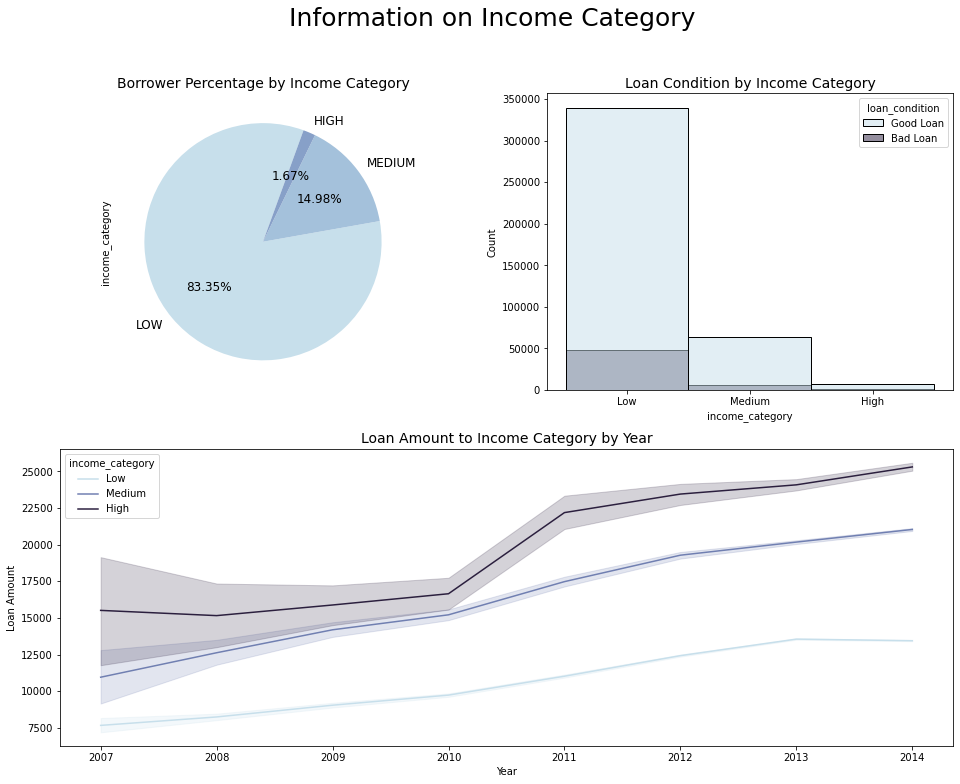

In [36]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Income Category', fontsize=25)

df["income_category"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=sns.color_palette("ch:s=.25,rot=-.25", 7), 
                                             labels=['LOW', 'MEDIUM', 'HIGH'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Income Category', fontsize=14)

sns.histplot(x=df['income_category'],hue=df['loan_condition'],ax=ax2,palette='ch:s=.25,rot=-.25')
ax2.set_title('Loan Condition by Income Category', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['income_category'],ax=ax3,palette='ch:s=.25,rot=-.25')
ax3.set_title('Loan Amount to Income Category by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

Observation:
- The majority of customers are in the **Low Income Group, with a percentage of 83.35%**
- Customers with **High Income Group tend to take out more loans than other Income Groups**

In [37]:
under5 = ['< 1 year','2 years','3 years','4 years']
under10 = ['5 years','6 years','7 years','8 years','9 years']

df['emp_length_category'] = np.nan

def emp_cat(status):
    if status in under5:
        return '< 5 years'
    elif status in under10:
        return '5-10 years'
    else:
        return '> 10 years'
    
df['emp_length_category'] = df['emp_length'].apply(emp_cat)

In [38]:
df['emp_length_category'].value_counts()

> 10 years    200679
< 5 years     142257
5-10 years    123349
Name: emp_length_category, dtype: int64

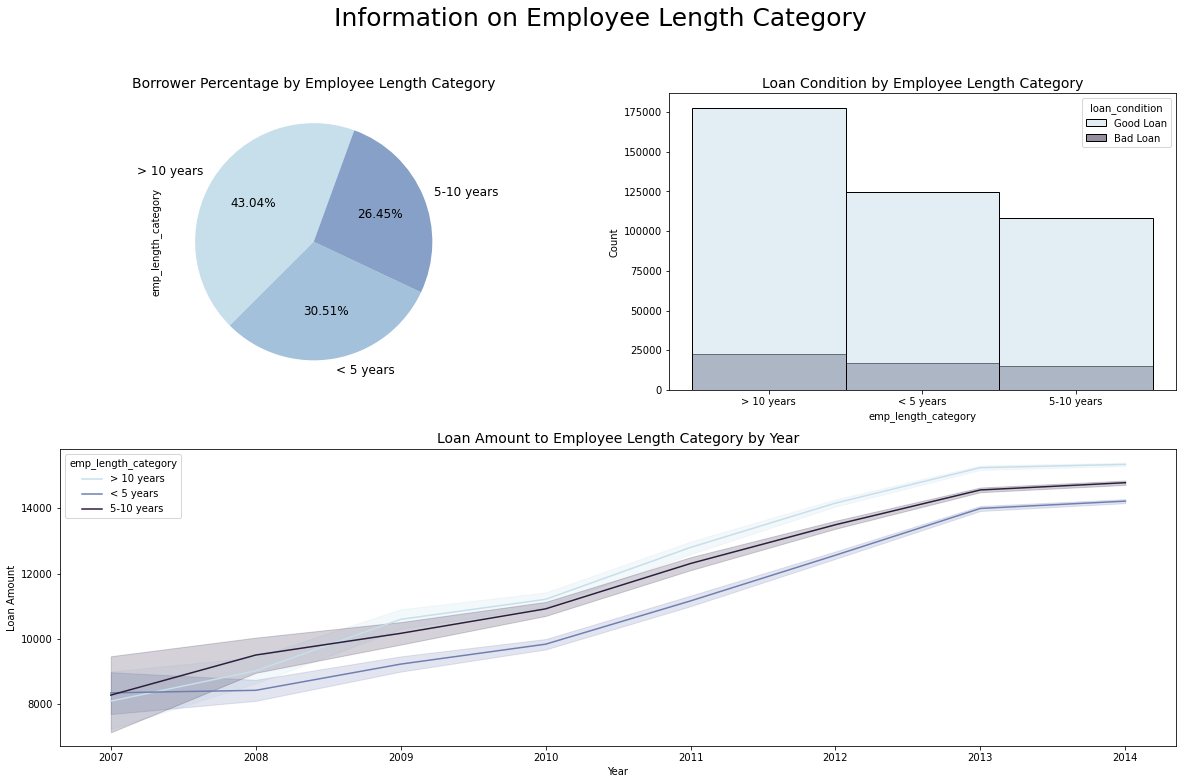

In [39]:
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Employee Length Category', fontsize=25)

df["emp_length_category"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=sns.color_palette("ch:s=.25,rot=-.25", 7), 
                                             labels=['> 10 years', '< 5 years', '5-10 years'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Employee Length Category', fontsize=14)

sns.histplot(x=df['emp_length_category'], hue=df['loan_condition'],ax=ax2,palette='ch:s=.25,rot=-.25')
ax2.set_title('Loan Condition by Employee Length Category', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['emp_length_category'],ax=ax3,palette='ch:s=.25,rot=-.25')
ax3.set_title('Loan Amount to Employee Length Category by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

In [40]:
df['emp_length_category'].value_counts()

> 10 years    200679
< 5 years     142257
5-10 years    123349
Name: emp_length_category, dtype: int64

Observation:
- 43.04% of customers have worked for more than 10 years
- **Customers who have worked for more than 10 years more likely to loan higher**

### Term

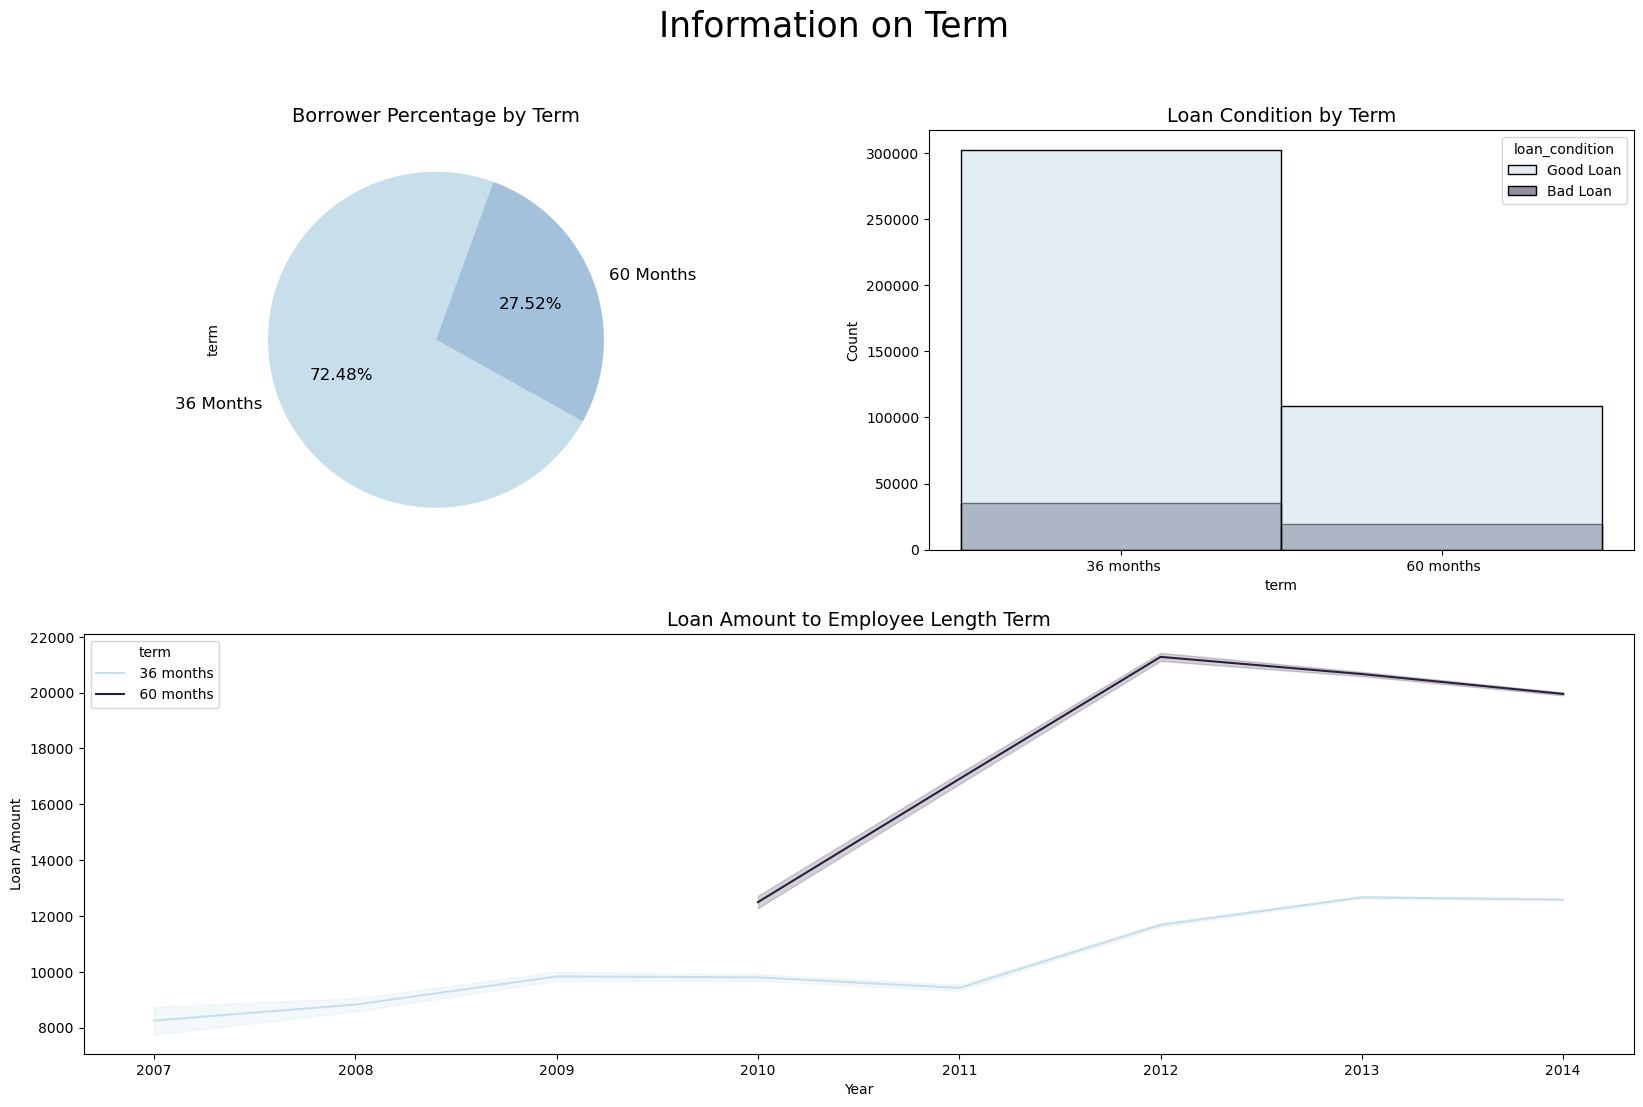

In [41]:
plt.style.use('default')
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Term', fontsize=25)

df["term"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=sns.color_palette("ch:s=.25,rot=-.25", 7), 
                                             labels=['36 Months', '60 Months'], fontsize=12, startangle=70)
ax1.set_title('Borrower Percentage by Term', fontsize=14)

sns.histplot(x=df['term'],hue=df['loan_condition'],ax=ax2,palette='ch:s=.25,rot=-.25')
ax2.set_title('Loan Condition by Term', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['term'],ax=ax3,palette='ch:s=.25,rot=-.25')
ax3.set_title('Loan Amount to Employee Length Term', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

Observation:
- Total of **72.48% of customers choose a payment term of 36 months**
- Customers who choose a payment term of **60 months tend to take more loans than customers with a payment term of 36 months**

### Delinquent

In [42]:
df['delinq_2yrs'].value_counts()

0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

In [43]:
df['delinq_2yrs_status'] = np.nan

def delinq_stat(status):
    if status == 0:
        return 0
    else:
        return 1
    
df['delinq_2yrs_status'] = df['delinq_2yrs'].apply(delinq_stat)

In [44]:
df['delinq_2yrs_status'].value_counts()

0    382954
1     83331
Name: delinq_2yrs_status, dtype: int64

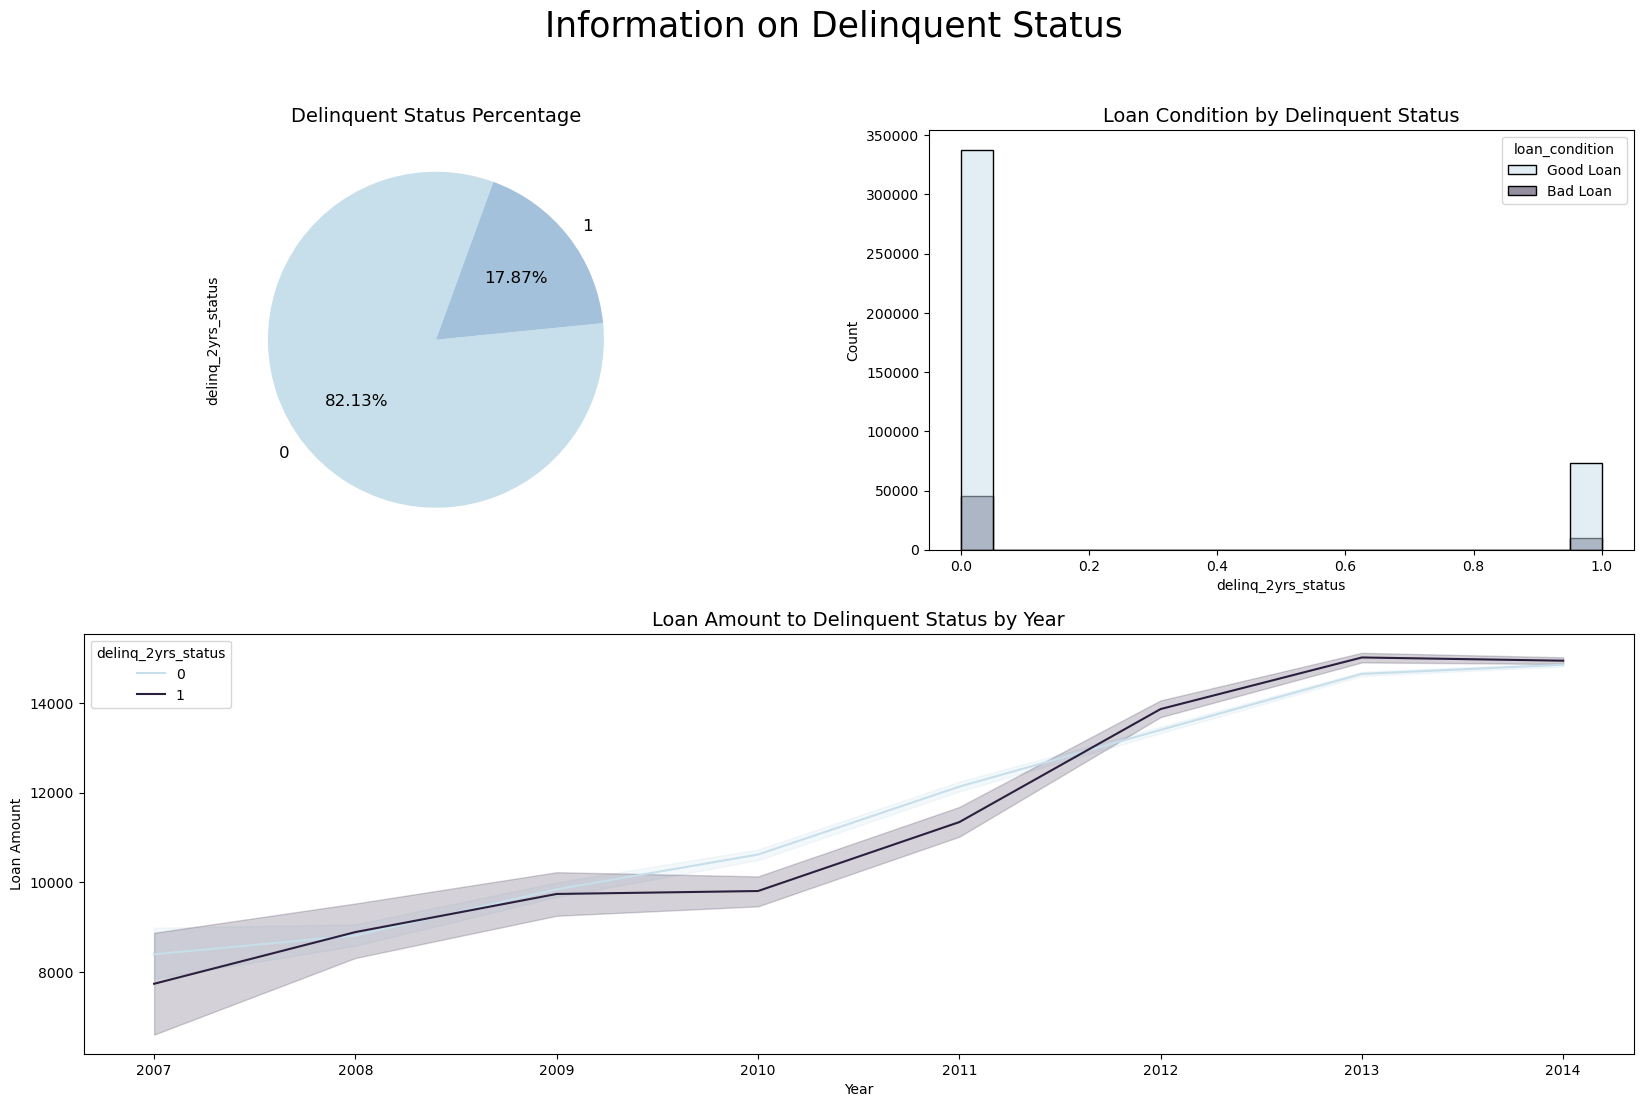

In [45]:
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.suptitle('Information on Delinquent Status', fontsize=25)

df["delinq_2yrs_status"].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=ax1, colors=sns.color_palette("ch:s=.25,rot=-.25", 7), 
                                             labels=[0, 1], fontsize=12, startangle=70)
ax1.set_title('Delinquent Status Percentage', fontsize=14)

sns.histplot(x=df['delinq_2yrs_status'], hue=df['loan_condition'],ax=ax2,palette='ch:s=.25,rot=-.25')
ax2.set_title('Loan Condition by Delinquent Status', fontsize=14)
ax2.set(ylabel="Count")

sns.lineplot(x=df['Year'],y=df['loan_amnt'],hue=df['delinq_2yrs_status'],ax=ax3,palette='ch:s=.25,rot=-.25')
ax3.set_title('Loan Amount to Delinquent Status by Year', fontsize=14)
ax3.set(ylabel="Loan Amount")


plt.show()

Observation:
- **82,13% Customers have no arrears status in the last 2 years**
- **Customers who have delinquent status tend to loan more than customers who do not have arrears**

## Feature Selection

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [47]:
df.nunique()

Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124436
purpose                            14
title                           63099
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs 

Feature that we need is:
- `loan_amnt`
- `term` 
- `grade`
- `emp_length_category`
- `home_ownership_status`
- `income_category`
- `verification_status`
- `loan_condition`
- `purpose`
- `delinq_2yrs_status`

We set `loan_condition` as a Target for this modelling

In [48]:
df_selection = df[['loan_amnt', 'term', 'grade', 'emp_length_category', 'home_ownership_status', 'income_category', 'verification_status', 'loan_condition', 'purpose', 'delinq_2yrs_status']]

In [49]:
df_selection.nunique()

loan_amnt                1352
term                        2
grade                       7
emp_length_category         3
home_ownership_status       4
income_category             3
verification_status         3
loan_condition              2
purpose                    14
delinq_2yrs_status          2
dtype: int64

In [50]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   loan_amnt              466285 non-null  int64 
 1   term                   466285 non-null  object
 2   grade                  466285 non-null  object
 3   emp_length_category    466285 non-null  object
 4   home_ownership_status  466285 non-null  object
 5   income_category        466285 non-null  object
 6   verification_status    466285 non-null  object
 7   loan_condition         466285 non-null  object
 8   purpose                466285 non-null  object
 9   delinq_2yrs_status     466285 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 35.6+ MB


## Data Cleaning

In [52]:
df_selection.isna().sum()

loan_amnt                0
term                     0
grade                    0
emp_length_category      0
home_ownership_status    0
income_category          0
verification_status      0
loan_condition           0
purpose                  0
delinq_2yrs_status       0
dtype: int64

Data is clean without null values

## Encoding

Encoding Strategy for Feature Selection:
- Label Encoding:`grade`and `income_category`
- One Hot Encoding:`term`,`emp_length_category`,`home_ownership_status`,`verification_status`,`purpose`

In [53]:
nums2 = [key for key in dict(df_selection.dtypes) if dict(df_selection.dtypes)[key] in ['float64', 'int64']]
cats2 = [key for key in dict(df_selection.dtypes) if dict(df_selection.dtypes)[key] in ['object']]

In [54]:
df_selection[nums2].describe()

,loan_amnt,delinq_2yrs_status
count,466285.000000,466285.000000
mean,14317.277577,0.178713
std,8286.509164,0.383112
min,500.000000,0.000000
25%,8000.000000,0.000000
50%,12000.000000,0.000000
75%,20000.000000,0.000000
max,35000.000000,1.000000


In [55]:
df_selection[cats2].describe()

,term,grade,emp_length_category,home_ownership_status,income_category,verification_status,loan_condition,purpose
count,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,3,4,3,3,2,14
top,36 months,B,> 10 years,MORTGAGE,Low,Verified,Good Loan,debt_consolidation
freq,337953,136929,200679,235875,388628,168055,410953,274195


In [56]:
df_selection['grade'].replace(['G', 'F', 'E', 'D', 'C', 'B', 'A'], [0, 1, 2, 3, 4, 5, 6], inplace=True)
df_selection['income_category'].replace(['Low', 'Medium', 'High'], [0, 1, 2], inplace=True)

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [57]:
df_selection.head()

,loan_amnt,term,grade,emp_length_category,home_ownership_status,income_category,verification_status,loan_condition,purpose,delinq_2yrs_status
0,5000,36 months,5,> 10 years,RENT,0,Verified,Good Loan,credit_card,0
1,2500,60 months,4,< 5 years,RENT,0,Source Verified,Bad Loan,car,0
2,2400,36 months,4,> 10 years,RENT,0,Not Verified,Good Loan,small_business,0
3,10000,36 months,4,> 10 years,RENT,0,Source Verified,Good Loan,other,0
4,3000,60 months,5,> 10 years,RENT,0,Source Verified,Good Loan,other,0


In [58]:
df_selection.nunique()

loan_amnt                1352
term                        2
grade                       7
emp_length_category         3
home_ownership_status       4
income_category             3
verification_status         3
loan_condition              2
purpose                    14
delinq_2yrs_status          2
dtype: int64

In [59]:
df_selection['loan_condition'].replace(['Bad Loan', 'Good Loan'], [0, 1], inplace=True)

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [60]:
for i in ['term','emp_length_category','home_ownership_status','verification_status','purpose']:
    onehots = pd.get_dummies(df[i], prefix=i)
    df_selection = df_selection.join(onehots)

In [61]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   loan_amnt                            466285 non-null  int64 
 1   term                                 466285 non-null  object
 2   grade                                466285 non-null  int64 
 3   emp_length_category                  466285 non-null  object
 4   home_ownership_status                466285 non-null  object
 5   income_category                      466285 non-null  int64 
 6   verification_status                  466285 non-null  object
 7   loan_condition                       466285 non-null  int64 
 8   purpose                              466285 non-null  object
 9   delinq_2yrs_status                   466285 non-null  int64 
 10  term_ 36 months                      466285 non-null  uint8 
 11  term_ 60 months           

In [62]:
df_selection = df_selection.drop(columns=['term','emp_length_category','home_ownership_status','verification_status','purpose'])

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_selection.corr(), cmap='YlOrBr', annot=True, fmt='.2f')

### Standardization

In [63]:
list_col_abnormal = []

for i in df_selection:
  if df_selection[i].min() != 0 and df_selection[i].max() != 1:
    list_col_abnormal.append(i)

print(list_col_abnormal)

['loan_amnt']


In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_selection['loan_amnt_ss'] = ss.fit_transform(df_selection['loan_amnt'].values.reshape(len(df_selection),1))

<AxesSubplot:xlabel='loan_amnt_ss', ylabel='Density'>

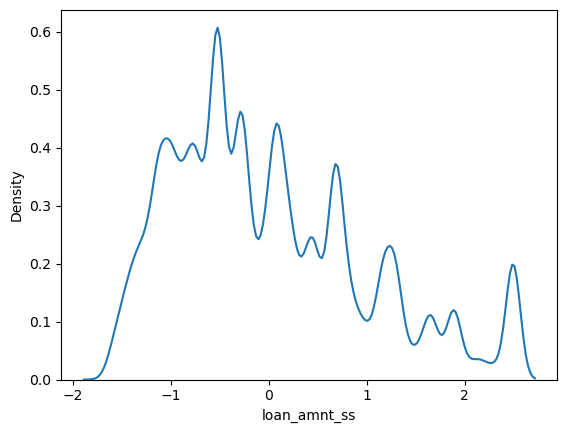

In [65]:
sns.kdeplot(x=df_selection['loan_amnt_ss'])

In [66]:
df_selection = df_selection.drop(columns= ['loan_amnt'])
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   grade                                466285 non-null  int64  
 1   income_category                      466285 non-null  int64  
 2   loan_condition                       466285 non-null  int64  
 3   delinq_2yrs_status                   466285 non-null  int64  
 4   term_ 36 months                      466285 non-null  uint8  
 5   term_ 60 months                      466285 non-null  uint8  
 6   emp_length_category_5-10 years       466285 non-null  uint8  
 7   emp_length_category_< 5 years        466285 non-null  uint8  
 8   emp_length_category_> 10 years       466285 non-null  uint8  
 9   home_ownership_status_MORTGAGE       466285 non-null  uint8  
 10  home_ownership_status_OTHER          466285 non-null  uint8  
 11  home_ownershi

## Modelling

### Prep for Modelling

In [67]:
#import library for modelling
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [68]:
X = df_selection[[col for col in df_selection.columns if (str(df_selection[col].dtype) != 'object') and col not in ['loan_condition']]]
y = df_selection['loan_condition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_classification2(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print('Test score:' + str(model.score(X_test, y_test))) #Test score
    print('Train score: ' + str(model.score(X_train, y_train))) #Train score


    conf_mat = confusion_matrix(y_test,y_pred)
    print(conf_mat)
    print('='*100)
    print()

In [70]:
print("Feature Variables: ")
print(X.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   grade                                466285 non-null  int64  
 1   income_category                      466285 non-null  int64  
 2   delinq_2yrs_status                   466285 non-null  int64  
 3   term_ 36 months                      466285 non-null  uint8  
 4   term_ 60 months                      466285 non-null  uint8  
 5   emp_length_category_5-10 years       466285 non-null  uint8  
 6   emp_length_category_< 5 years        466285 non-null  uint8  
 7   emp_length_category_> 10 years       466285 non-null  uint8  
 8   home_ownership_status_MORTGAGE       466285 non-null  uint8  
 9   home_ownership_status_OTHER          466285 non-null  uint8  
 10  home_ownership_status_OWN            466285 non-null  uint8 

### Random Forest (Default)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification2(rf)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.93
Precision (Test Set): 0.88
Precision (Train Set): 0.93
Recall (Test Set): 0.95
Recall (Train Set): 0.99
F1-Score (Test Set): 0.92
F1-Score (Train Set): 0.96
Test score:0.8481549261541541
Train score: 0.9287620366483966
[[  1290  15449]
 [  5792 117355]]



### Decision Tree (Default)

In [72]:
#import sklearn DT and create decision tree function
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [73]:
dt_model = DecisionTreeClassifier()

#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
eval_classification2(dt_model)

Accuracy (Test Set): 0.83
Accuracy (Train Set): 0.93
Precision (Test Set): 0.89
Precision (Train Set): 0.94
Recall (Test Set): 0.92
Recall (Train Set): 0.98
F1-Score (Test Set): 0.90
F1-Score (Train Set): 0.96
Test score:0.8252648585276582
Train score: 0.928792673997163
[[  2065  14674]
 [  9769 113378]]



### Decision Tree (Hypertuning Parameter)

In [75]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [76]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.881761,0.880338
1,2,0.881761,0.880338
2,3,0.881761,0.880338
3,4,0.881761,0.880338
4,5,0.881764,0.880353


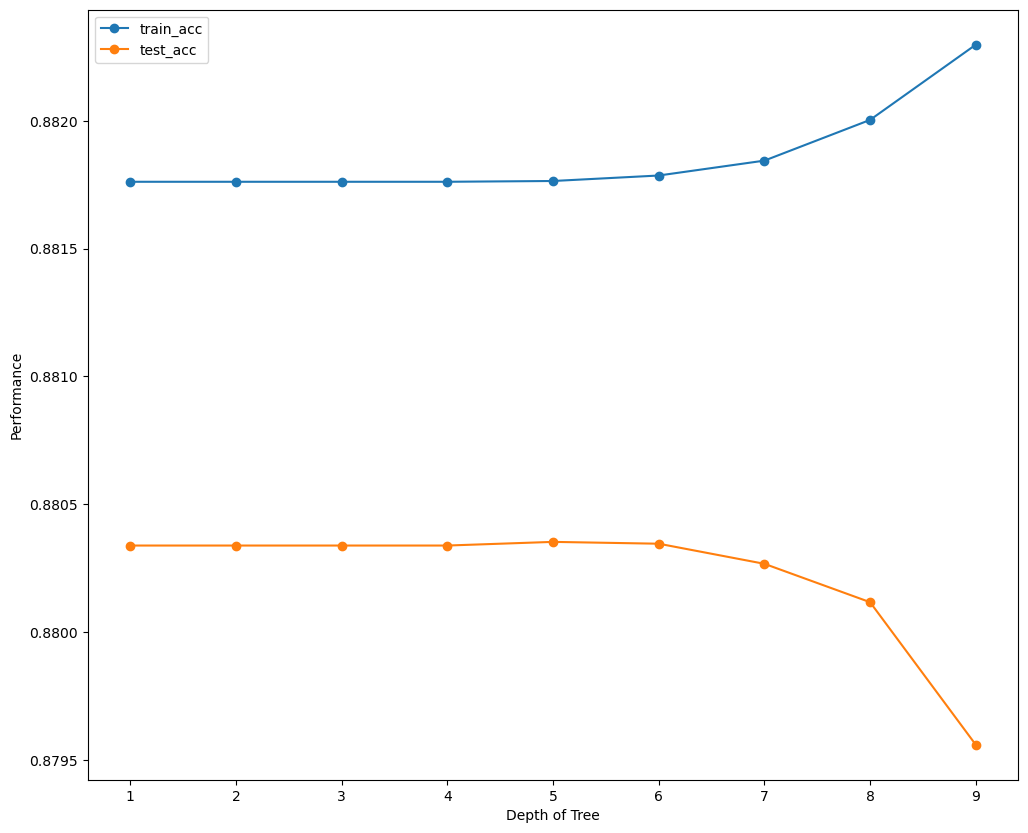

In [77]:
plt.figure(figsize=(12,10))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['train_acc', 'test_acc'])

In [78]:
dt_model_def = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy',min_samples_split = 4, min_samples_leaf=3)

In [79]:
dt_model_def.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=4)

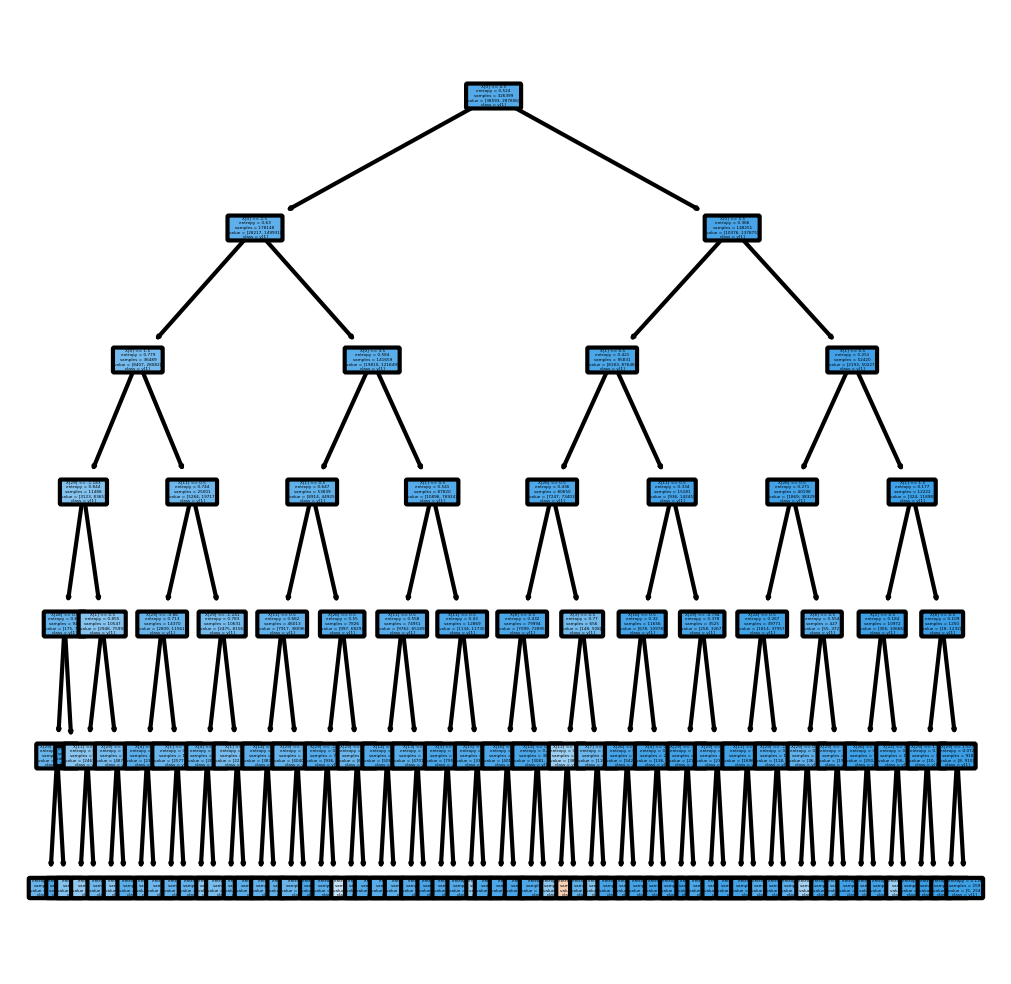

In [80]:
from sklearn import tree
from sklearn.tree import export_graphviz
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_model_def,filled=True, rounded=True, class_names = True)
plt.savefig('TreeIdx.png', dpi=200);

In [81]:
eval_classification2(dt_model_def)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.88
Precision (Train Set): 0.88
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 0.94
Test score:0.8803382754528688
Train score: 0.881770471110512
[[     4  16735]
 [     4 123143]]



In [82]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

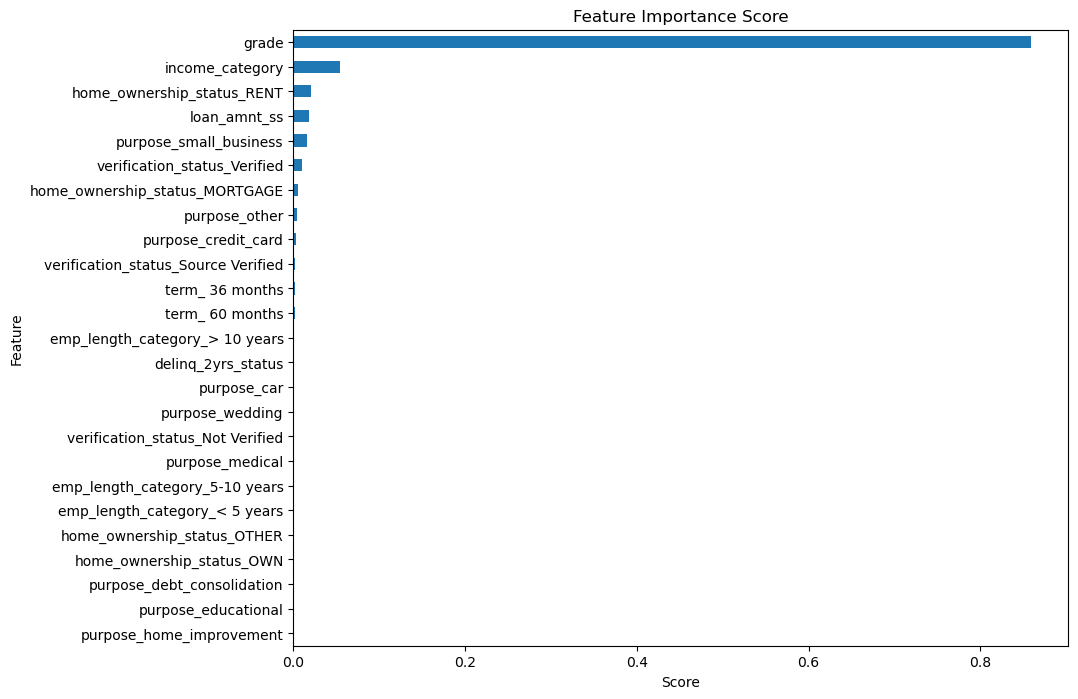

In [83]:
show_feature_importance(dt_model_def)

### Log Reg (Default)

In [84]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [85]:
eval_classification2(log_model)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.88
Precision (Train Set): 0.88
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 0.94
Test score:0.8803454241310782
Train score: 0.881693877738596
[[    14  16725]
 [    13 123134]]



In [86]:
log_model.fit(X / np.std(X, 0), y)
print(log_model.coef_)

[[ 0.47778773  0.14853087  0.01327891  0.04934285  0.07263928  0.01894324
   0.030507    0.06478727  0.09736907 -0.00810996  0.03221909 -0.00654953
   0.05927405  0.06161533 -0.00396389  0.0214611   0.07647169  0.03127796
  -0.0171119   0.01550436  0.00245958  0.02142253  0.00254453  0.00359261
   0.0136417  -0.00286508 -0.0524057   0.01023598  0.01118271 -0.02290913]]


### Log Reg (Feature Importance)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_23308/1259463102.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(importances['Attribute'], y=importances['Attribute'])


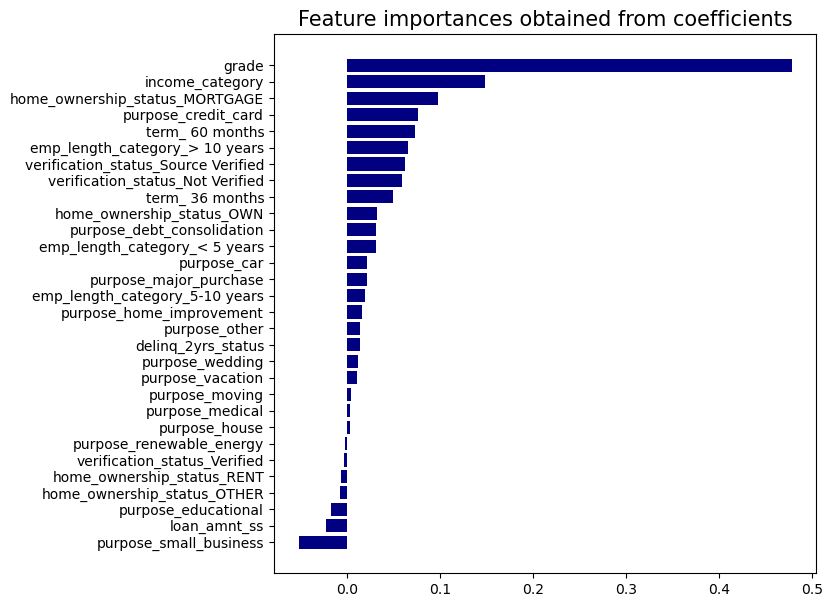

In [92]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(7,7))

plt.title('Feature importances obtained from coefficients', size=15)

ax.barh(importances['Attribute'], importances['Importance'], align='center',color='navy')
ax.set_yticklabels(importances['Attribute'], y=importances['Attribute'])
ax.invert_yaxis()
plt.show()

As we can see, the Decision Tree results after Hyperparameter Tuning and the default Logistic Regression results have the same evaluation value (Precision) but differ in Feature Importance. Based on exploratory data analysis and feature importance, we make two recommendations for credit risk management.

## Credit Risk Management (Based on Feature Importance and EDA)

**Credit Risk Management with Log Reg Model (Based on Feature Importance and EDA):**

1. The most important factor in determining whether a borrower is eligible for a Good Loan or a Bad Loan is their credit score. According to EDA results, Credit Score **G** is the lowest grade that is risky and may result in a default.
2. Income is the second most important factor in determining whether a loan is good or bad. According to the EDA results, bad loaners are dominated by Low Income, but this needs to be reviewed further with several other features.
3. Mortgage home owners are preferred borrowers. Borrowers with Mortgage home status, according to our analysis, are more accustomed to paying an installment.
4. Credit card borrowers are prioritized over other types of borrowers. Credit card users are accustomed to making installment payments, and the risk of default may be reduced as a result.
5. Borrowers with a 60-month repayment period are more likely to have their loans approved. The longer the loan period, the easier it is to pay the installments with low installments to make it easier for customers and reduce the risk of default. The interest rate rises as the payment period lengthens.
6. Loan Amount is a relatively minor feature. The greater the loan amount requested by the customer, the greater the risk of default.

**Credit Risk Management with Decision Tree Model (Based on Feature Importance and EDA):**

1. The most important factor in determining whether a borrower is eligible for a Good Loan or a Bad Loan is their credit score. According to EDA results, Credit Score **G** is the lowest grade that is risky and may result in a default.
2. Income is the second most important factor in determining whether a loan is good or bad. According to the EDA results, bad loaners are dominated by Low Income, but this needs to be reviewed further with several other features.
3. Customers who own rental properties are more likely to have their loans approved. Customers with rental housing status, according to the analysis, are more accustomed to paying in installments. Customers with mortgage home ownership status are also eligible for approval.
4. Customers who want to borrow money to start a small business are more likely to be approved based on the Decision Tree model results. Furthermore, several lending purposes, such as credit cards and other purposes, can be considered.
5. Customers with approved loan verification status are given priority consideration for loan approval. Customers with "Source Verified" verification status are also eligible for approval.
6. Borrowers with a 60-month repayment period are more likely to have their loans approved. The longer the loan period, the easier it is to pay the installments with low installments to make it easier for customers and reduce the risk of default. The interest rate rises as the payment period lengthens.